In [1]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

plt.rcParams['figure.figsize'] = [16, 4]
from plot_utils import *

In [2]:
def plot_one_result_pval_var(ax,plot_item_list,ate_noise,run_list,pval_list,main_enum,noise,reg_fname_pattern,erm_fname_pattern,pvalt0=None,pvalt1=None,clambda=None,telambda=None,t0ate=None,t1ate=None,hwidth=None,label_prefix=""):
    #Getting the result dict
    if clambda!=None:
        if t0ate!=None and hwidth!=None:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=reg_fname_pattern.format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              pvalt1,
                                                                              t0ate,
                                                                              t1ate,
                                                                              ate_noise,
                                                                              clambda,
                                                                              hwidth,
                                      )
                    )
        elif t0ate!=None and hwidth==None:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=reg_fname_pattern.format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              pvalt1,
                                                                              t0ate,
                                                                              t1ate,
                                                                              ate_noise,
                                                                              clambda,
                                      )
                    )
        else:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=reg_fname_pattern.format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              pvalt1,
                                                                              ate_noise,
                                                                              clambda,
                                      )
                    )
    else:
        #This is not being used now. We directly pass the fname and telambda inside the clambda
        result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      enum=main_enum,
                                      fname_pattern="dataset/nlp_toy2/nlp_logs/cad.s2.rnum({}).noise({}).pval({}).ate_noise({}).telambda({})/probe_metric_list.json".format(
                                                                          "{1}",
                                                                          noise,
                                                                          "{0}",
                                                                          ate_noise,
                                                                          telambda,
                                  )
                )
    
    #Add the erm curve
    erm_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=erm_fname_pattern.format(
                                                                          "{1}",
                                                                          noise,
                                                                          "{0}",
                                                                          pvalt1,
                                  )
    
    )
    
    #Plotting each of the plot item
    for pidx,plot_item in enumerate(plot_item_list):
        #Getting the erm value
        _, labels = ax[pidx].get_legend_handles_labels()
        if "erm" not in labels:
            erm_item_yval=[erm_result_dict[pval][plot_item]["mean"] for pval in pval_list]
            yerr=[0.0]*len(erm_item_yval)
            #Plotting the item
            ax[pidx].errorbar(pval_list,erm_item_yval,yerr,label="erm",ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
            
           
        
            
        #Getting the value for this item
        item_yval = [result_dict[pval][plot_item]["mean"] for pval in pval_list]
        yerr=[0.0]*len(item_yval)
        #Plotting the item
        ax[pidx].errorbar(pval_list,item_yval,yerr,label=label_prefix+"ate_noise={}".format(ate_noise),ls="-.",marker="o",alpha=0.7)
        #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
        
        
        
        
        ax[pidx].set_xlabel("predictive-correlation")
        ax[pidx].set_ylabel(plot_item)
        
        if "pdelta" not in plot_item:
            ax[pidx].set_ylim(0.0,1.1)
        
        ax[pidx].legend()
        ax[pidx].grid(True)

In [3]:
def plot_one_result_ate_pval_pair(ax,plot_item_list,ate_noise_list,run_list,pval_list,main_enum,noise,reg_fname_pattern,erm_fname_pattern,pvalt0=None,pvalt1=None,clambda=None,telambda=None,t0ate=None,t1ate=None):
    #Getting the result dict
    #Getting the result dict for all the ate noise also
    all_result_dict=defaultdict(dict)
    for ate_noise in ate_noise_list:
        if clambda!=None:
            if t0ate!=None:
                result_dict = get_all_result_dict(run_list=run_list,
                                              pval_list=pval_list,
                                              enum=main_enum,
                                              fname_pattern=reg_fname_pattern.format(
                                                                                  "{1}",
                                                                                  noise,
                                                                                  "{0}",
                                                                                  pvalt1,
                                                                                  t0ate,
                                                                                  t1ate,
                                                                                  ate_noise,
                                                                                  clambda,
                                          )
                        )
                all_result_dict[ate_noise]=result_dict
            else:
                result_dict = get_all_result_dict(run_list=run_list,
                                              pval_list=pval_list,
                                              enum=main_enum,
                                              fname_pattern=reg_fname_pattern.format(
                                                                                  "{1}",
                                                                                  noise,
                                                                                  "{0}",
                                                                                  pvalt1,
                                                                                  ate_noise,
                                                                                  clambda,
                                          )
                        )
                all_result_dict[ate_noise]=result_dict
        else:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern="dataset/nlp_toy2/nlp_logs/cad.s2.rnum({}).noise({}).pval({}).ate_noise({}).telambda({})/probe_metric_list.json".format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              ate_noise,
                                                                              telambda,
                                      )
                    )

    #Add the erm curve
    erm_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=erm_fname_pattern.format(
                                                                          "{1}",
                                                                          noise,
                                                                          "{0}",
                                                                          pvalt1,
                                  )
    
    )
    
    #Plotting each of the plot item
    for pidx,plot_item in enumerate(plot_item_list):
        #Getting the erm value
        _, labels = ax[pidx].get_legend_handles_labels()
        if "erm" not in labels:
            erm_item_yval=[erm_result_dict[pval][plot_item]["mean"] for pval in pval_list]
            yerr=[0.0]*len(erm_item_yval)
            #Plotting the item
            ax[pidx].errorbar(pval_list,erm_item_yval,yerr,label="erm",ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
            
           
        
            
        #Getting the value for this item
        item_yval = [all_result_dict[ate_noise][pval][plot_item]["mean"] for ate_noise,pval in zip(ate_noise_list,pval_list)]
        yerr=[0.0]*len(item_yval)
        #Plotting the item
        ax[pidx].errorbar(pval_list,item_yval,yerr,label="ate_noise={}".format("stage1"),ls="-.",marker="o",alpha=0.7)
        #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
        
        
        
        
        ax[pidx].set_xlabel("predictive-correlation")
        ax[pidx].set_ylabel(plot_item)
        
        if "pdelta" not in plot_item:
            ax[pidx].set_ylim(0.0,1.1)
        
        ax[pidx].legend()
        ax[pidx].grid(True)

In [8]:
def plot_one_result_timeline(ax,plot_item_list,run_list,pval_list,ate_list,fname_pattern,tidx,title,num_topics=1,plot_upto=-1,no_plot_mode=False,print_best_result=True):
    #Getting the timeline
    result_dict_timeline = get_all_result_timeline_stage2(
                                            run_list= run_list,
                                            pval_list=pval_list,
                                            ate_list = ate_list,
                                            fname_pattern=fname_pattern
    )
    best_result_pval_var = {}
    for pval in pval_list:
        best_result_pval_var[pval] = get_best_interation_indo_ood(result_dict_timeline,num_topics,plot_upto,pval,print_best_result)
        
    if no_plot_mode==True:
        return best_result_pval_var
            
    
#     print(result_dict_timeline)
    
    #Plotting each of the plot item
    for pidx,plot_item in enumerate(plot_item_list):
        #Getting the erm value
        
        #Getting the timeline item
        for pval in pval_list:
            item_pval_yval_timeline = result_dict_timeline[pval][plot_item]["mean"][0:plot_upto]
            yerr= result_dict_timeline[pval][plot_item]["std"][0:plot_upto]
            xval = range(len(item_pval_yval_timeline))

            #Plotting the item
            ax[pidx,tidx].errorbar(xval,item_pval_yval_timeline,yerr,label="{}+pval={}".format(title,pval),ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
            
            ax[pidx,tidx].set_xlabel("epoch")
            ax[pidx,tidx].set_ylabel(plot_item)
            
            if "pdelta" in plot_item:
                ax[pidx,tidx].set_ylim(0,0.75)
            elif "te_loss" in plot_item:
                pass
            else:
                ax[pidx,tidx].set_ylim(0.0,1.09)
        
#             if "pdelta" not in plot_item or "loss" not in plot_item or "norm" not in plot_item:
#                 ax[pidx,0].set_ylim(0.0,1.1)
            
#             if "pdelta" in plot_item or "smin" in plot_item:
#                 pass
#             else:
            ax[pidx,tidx].legend()
            ax[pidx,tidx].grid(True)
            ax[pidx,tidx].set_title(title)
        
#         if plot_item=="emb_norm":
#             continue
    
    return best_result_pval_var

In [33]:
def get_best_interation_indo_ood(result_dict_timeline,num_topics,num_epoch,pval,print_best_result):
    #Getting the number of iteration
#     num_epoch = result_dict_timeline["inf"]["acc:main"]["mean"]
    
    #Going over the iteration and selecting the best iteation based on mean indo and ood
    indo = result_dict_timeline[pval]["acc:main"]["mean"][0:num_epoch]
    indo_std = result_dict_timeline[pval]["acc:main"]["std"][0:num_epoch]
    acc_sum = indo.copy()
    for tidx in range(num_topics):
        ood = result_dict_timeline[pval]["topic{}_smin".format(tidx)]["mean"][0:num_epoch]
        acc_sum += ood
    crit = acc_sum/num_topics
    #Getting the max position and the guy
    best_loc = np.argmax(crit)
    
    
    #Initializing the best result dict
    result_dict={}
    result_dict["overall"]=crit[best_loc]
    result_dict["indo"]=indo[best_loc]
    result_dict["indo_std"]=indo_std[best_loc]
    
    if print_best_result:
        print("=============================================")
        print("Getting the best setting for pval:{}".format(pval))    
        print("\n\nbest loc :",best_loc)
        print("overall_avg_acc: ",np.around(result_dict["overall"],decimals=2))
        print("best indo:",np.around(result_dict["indo"],decimals=2))
    for tidx in range(num_topics):
        ood = result_dict_timeline[pval]["topic{}_smin".format(tidx)]["mean"][0:num_epoch]
        ood_std = result_dict_timeline[pval]["topic{}_smin".format(tidx)]["std"][0:num_epoch]
        result_dict["ood{}".format(tidx)]=ood[best_loc]
        result_dict["ood{}_std".format(tidx)]=ood_std[best_loc]
        if print_best_result:
            print("best ood{} :".format(tidx),np.around(result_dict["ood{}".format(tidx)],decimals=2))
    
    return result_dict

# Toy3 Dataset 

## Variation with epochs

Getting the best setting for pval:0.5


best loc : 13
overall_avg_acc:  1.42
best indo: 0.73
best ood0 : 0.7
Getting the best setting for pval:0.6


best loc : 13
overall_avg_acc:  1.32
best indo: 0.72
best ood0 : 0.6
Getting the best setting for pval:0.7


best loc : 15
overall_avg_acc:  1.22
best indo: 0.72
best ood0 : 0.5
Getting the best setting for pval:0.8


best loc : 0
overall_avg_acc:  1.12
best indo: 0.7
best ood0 : 0.41
Getting the best setting for pval:0.9


best loc : 17
overall_avg_acc:  0.95
best indo: 0.73
best ood0 : 0.23
Getting the best setting for pval:0.99


best loc : 18
overall_avg_acc:  0.81
best indo: 0.74
best ood0 : 0.07
Getting the best setting for pval:0.5


best loc : 2
overall_avg_acc:  1.46
best indo: 0.74
best ood0 : 0.72
Getting the best setting for pval:0.6


best loc : 3
overall_avg_acc:  1.38
best indo: 0.73
best ood0 : 0.65
Getting the best setting for pval:0.7


best loc : 2
overall_avg_acc:  1.29
best indo: 0.73
best ood0 : 0.56
Getting the best 

{0.5: {'overall': 1.4387947916984558,
  'indo': 0.7296467026074728,
  'ood0': 0.709148089090983},
 0.6: {'overall': 1.3623093763987222,
  'indo': 0.7265745202700297,
  'ood0': 0.6357348561286926},
 0.7: {'overall': 1.2692226966222129,
  'indo': 0.7281106114387512,
  'ood0': 0.5411120851834615},
 0.8: {'overall': 1.169128348429998,
  'indo': 0.7219662268956503,
  'ood0': 0.44716212153434753},
 0.9: {'overall': 1.0306768417358398,
  'indo': 0.7219661871592203,
  'ood0': 0.30871065457661945},
 0.99: {'overall': 0.8243280649185181,
  'indo': 0.7235022981961569,
  'ood0': 0.10082576672236125}}

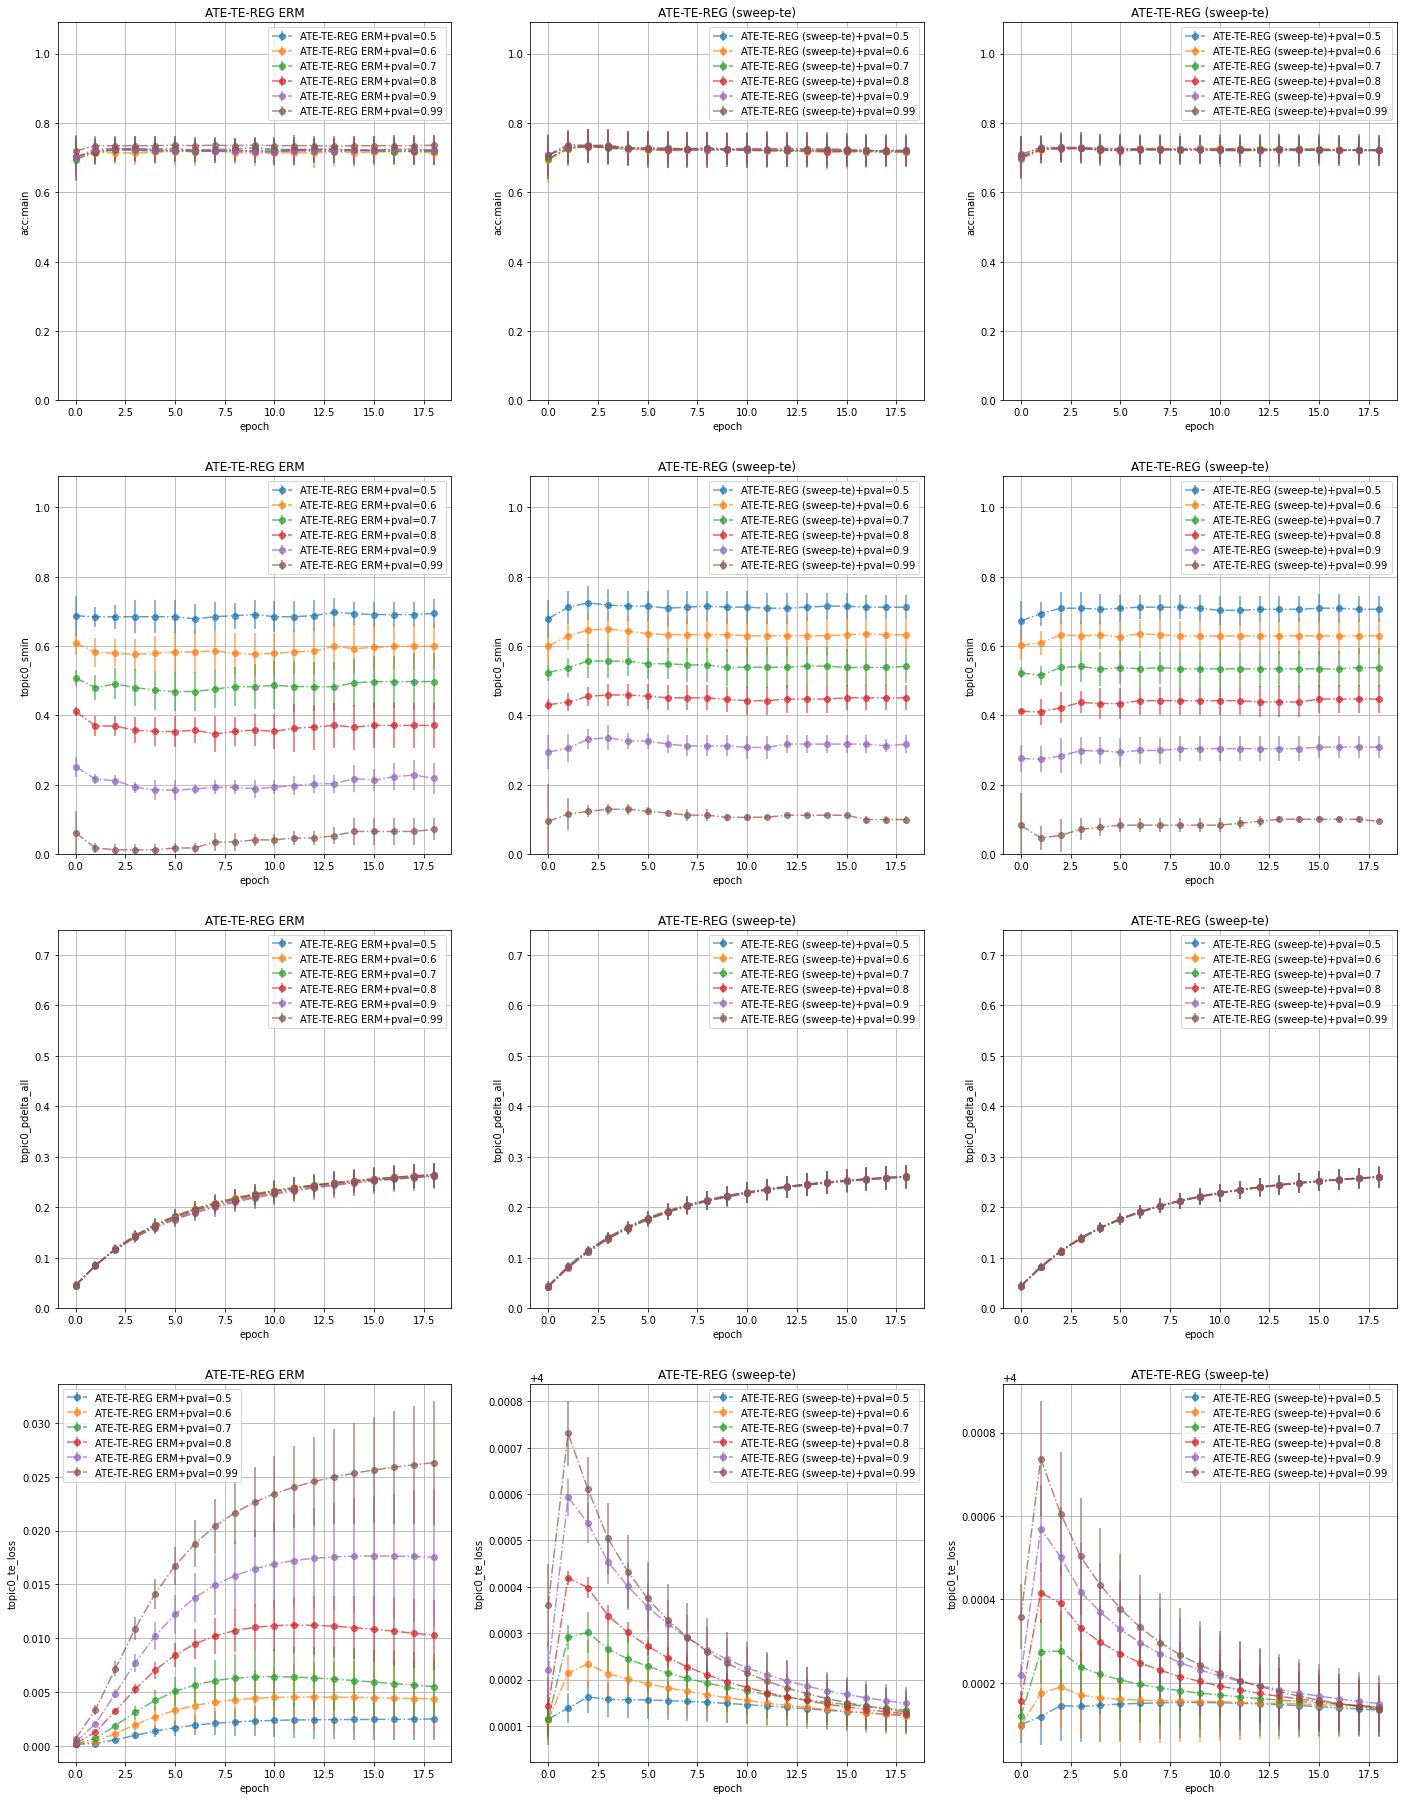

Bad pipe message: %s [b'\x88\xe7$\x9cz\xed\xac\x8b\xf4\xecxV\xe5,qJ\xb4O \x9d\xcb\xcd\xf4_\xbe\x0e\x16\x15w\xe7F\x08\xc5\xd8\xd4!7\x1b\x18\xde]\xef\x14\x05\xad\xd47#+\x042\x00\x08\x13\x02\x13\x03', b'\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127', b'.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00']
Bad pipe message: %s [b'\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01']
Bad pipe message: %s [b"\xa9\xdb<@\xebE\x80\x1e\xc21\xd8CF\x84*\xe6a\xbd\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0"]
Bad pipe message: %s [b'\x14\x009\x008\xc0\t\xc0\x13']
Bad pipe message: %s [b"{}\xb7K\\\xf0\x0cZ\x16\x17\x15\xf8\xf1\x1fdT(\xb9\x00

In [25]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
# ate_list_de_acc = [-0.005,0.08,0.131,0.21,0.26,0.35]
# ate_list_de_loss = [-0.017,0.07,0.09,0.21,0.3,0.26] #(0.7,0.12 miss)
# ate_list_dr_acc = [0.01,0.05,0.15,0.18,0.22,0.24]
# ate_list_dr_loss = [0.03,0.03,0.127,0.197,0.22,0.24]

# #alpha and gval selection using the gval accuracy
# ate_list_sel_de_acc = [-0.0002,0.124,0.0006,0.008,0.06,0.35]
# ate_list_sel_dr_acc = [0.01,0.1,0.15,0.26,0.04,0.31] #(0.7,0.16 miss)


# #alpha and gval section using the loss
# ate_list_sel_de_loss = [-0.0002,0.001,0.0006,0.01,0.06,0.11] #(full slot missing)
# ate_list_sel_dr_loss = [0.02,0.09,0.19,0.18,0.35,0.29]

num_cols = 3

topic_name="spurious"
sample=1000


telambda = 10 # 0 10 100
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
            "topic0_te_loss",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).erm/probe_metric_list.json"


plt.rcParams['figure.figsize'] = [8*num_cols, 8*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),num_cols)

# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dummy,
#                          fname_pattern=erm_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
                             
#                          ),
#                          tidx=0,
#                          title="ERM",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_true,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=1,
#                          title="ATE-TE-REG True",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_de_acc,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=2,
#                          title="ATE-TE-REG DE-Acc",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_de_loss,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=3,
#                          title="ATE-TE-REG DE-Loss",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dr_acc,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=3,
#                          title="ATE-TE-REG DR-Acc",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dr_loss,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=5,
#                          title="ATE-TE-REG DR-Loss",
# )



#Plotting the ERM (using the telambda=0)
dummy_ate_val = [0.0]*len(pval_list) #since we use telambda =0 these ate doesnt matter
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=dummy_ate_val,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             0,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG ERM",
)

#Plotting the regularized timeline
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=[-2.0]*len(pval_list),
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG (sweep-te)",
)

#Plotting the regularized timeline
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=[2.0]*len(pval_list),
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG (sweep-te)",
)


## Sweep on the te ate value

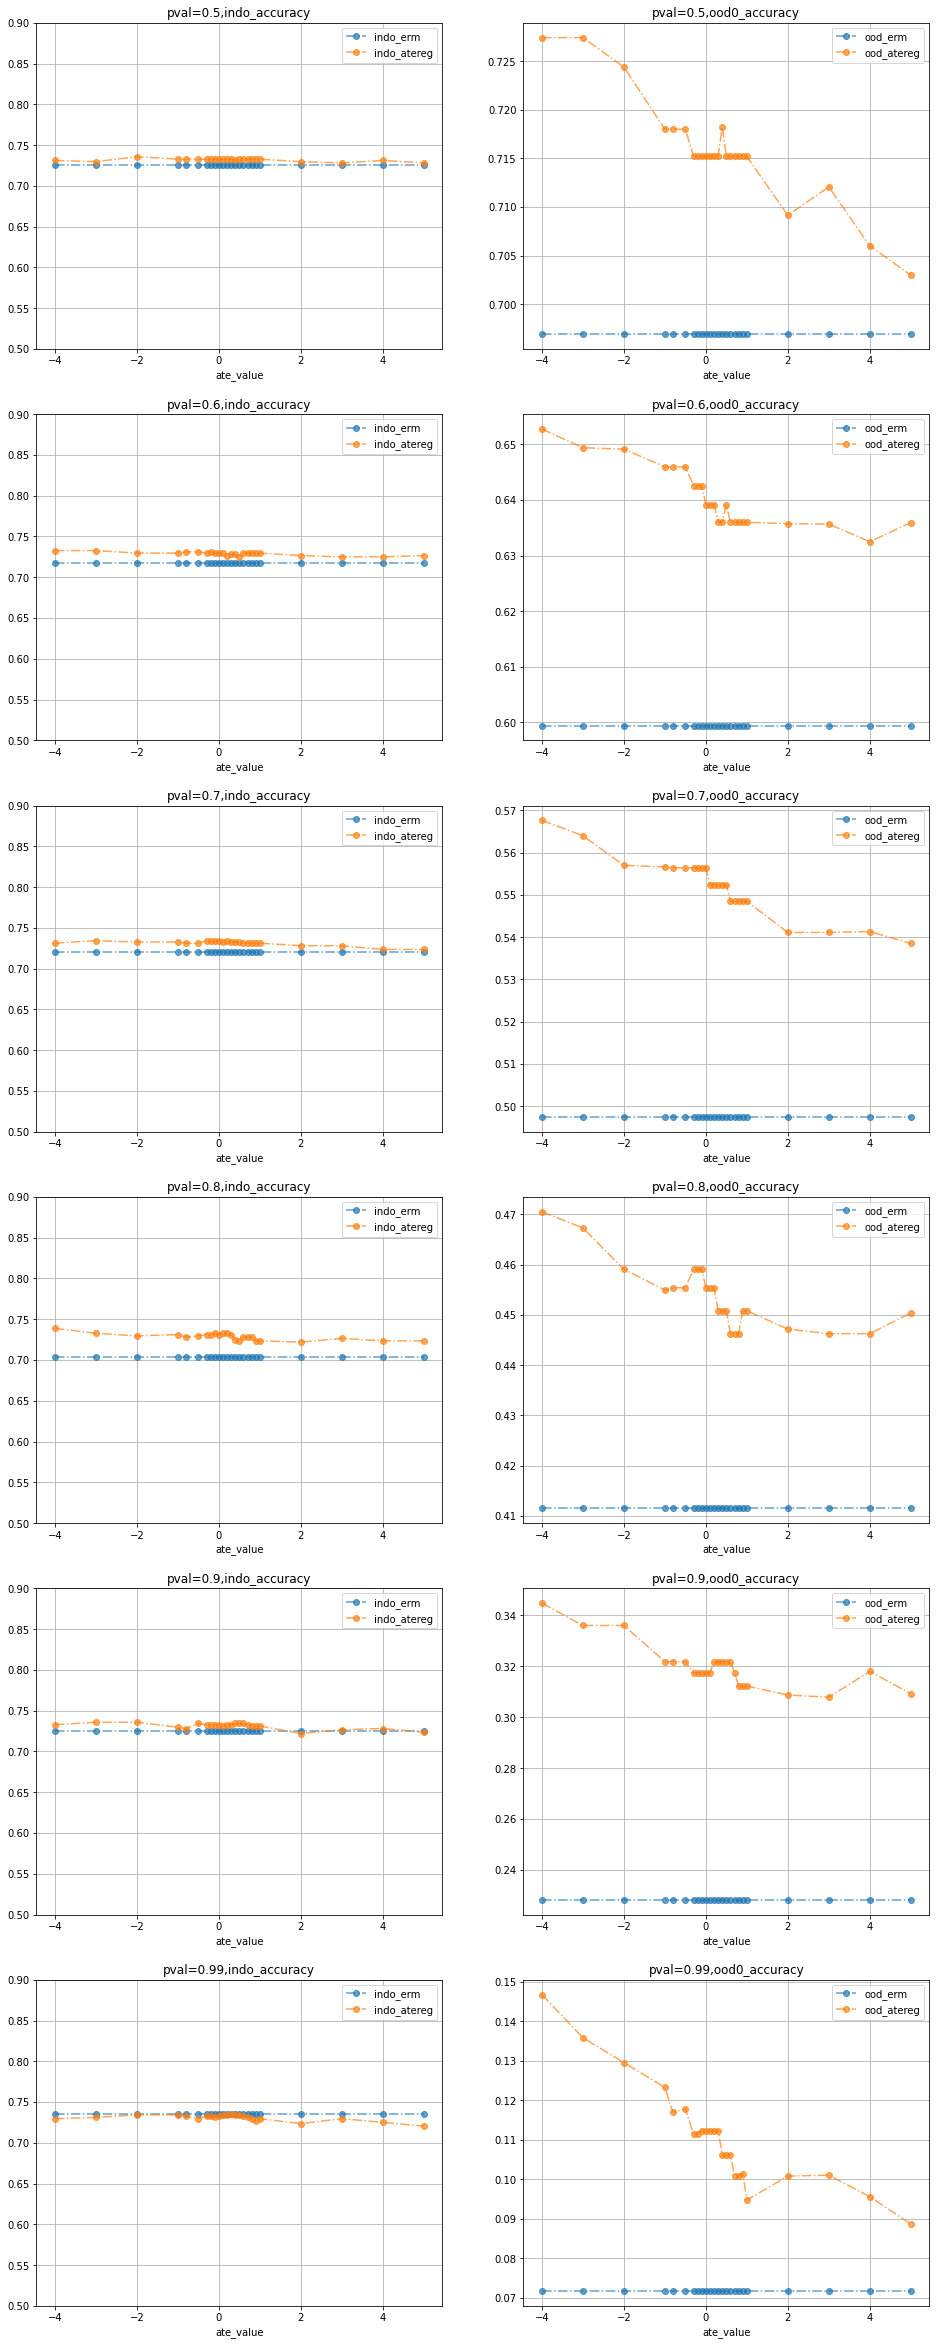

In [15]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = [-0.005,0.08,0.131,0.21,0.26,0.35]
ate_list_de_loss = [-0.017,0.07,0.12,0.21,0.3,0.26]
ate_list_dr_acc = [0.01,0.05,0.15,0.18,0.22,0.24]
ate_list_dr_loss = [0.03,0.03,0.127,0.197,0.22,0.24]

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [-0.0002,0.124,0.0006,0.008,0.06,0.35]
ate_list_sel_dr_acc = [0.01,0.1,0.16,0.26,0.04,0.31]


#alpha and gval section using the loss
ate_list_sel_de_loss = [-0.0001,0.001,0.004,0.01,0.06,0.11]
ate_list_sel_dr_loss = [0.02,0.09,0.19,0.18,0.35,0.29]



ate_sweep_list = [-4.0,-3.0,-2.0,-1.0,-0.8,-0.5,-0.3,-0.2,-0.1] + [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] + [2.0,3.0,4.0,5.0]
#Adding the ate to mark in the sweep plot
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
    ate_list_dr_acc = ate_list_dr_acc,
    ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
    ate_list_sel_de_loss = ate_list_sel_de_loss,
    ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="spurious"
sample=1000
num_topics=1


telambda = 10 #0, 10, 100
noise=0.0

reg_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).erm/probe_metric_list.json"

#Getting the best result for the erm runs
# erm_pval_best_result = plot_one_result_timeline(ax=None,
#                          plot_item_list=None,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dummy,
#                          fname_pattern=erm_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
                             
#                          ),
#                          tidx=None,
#                          title=None,
#                          no_plot_mode=True,
#                          print_best_result=False,
# )

#We have used te_lambda=0 for this experiment though!
dummy_ate_val = 0.1
erm_pval_best_result = plot_one_result_timeline(ax=None,
                         plot_item_list=None,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=[dummy_ate_val,]*len(pval_list),
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             0,#telambda

                         ),
                         tidx=None,
                         title=None,
                         no_plot_mode=True,
                         print_best_result=False,
)

#Getting the best result for every te effect in sweep list
atereg_pval_best_result={}
for ate_val in ate_sweep_list:
    atereg_pval_best_result[ate_val] = plot_one_result_timeline(ax=None,
                                                     plot_item_list=None,
                                                     run_list=run_list,
                                                     pval_list=pval_list,
                                                     ate_list=[ate_val,]*len(pval_list),
                                                     fname_pattern=reg_fname_pattern.format(
                                                                         "{1}",
                                                                         topic_name,
                                                                         sample,
                                                                         noise,
                                                                         "{0}",
                                                                         "{2}",
                                                                         telambda,

                                                     ),
                                                     tidx=None,
                                                     title=None,
                                                     no_plot_mode=True,
                                                     print_best_result=False,
    )



num_cols = num_topics+1 #assuming trained combined so only one indo
plt.rcParams['figure.figsize'] = [8*num_cols, 7*len(pval_list)]
fig,ax = plt.subplots(len(pval_list),num_cols)
#Plotting each of the variation for the pval
for pidx,pval in enumerate(pval_list):
    #Plotting the indo for the erm
    erm_best_indo = [erm_pval_best_result[pval]["indo"]]*len(ate_sweep_list)
    ax[pidx,0].plot(ate_sweep_list,erm_best_indo,ls="-.",marker="o",alpha=0.7,label="indo_erm")
    
    #Creating the varation of best indo and ood acc for each of the ate val
    atereg_best_indo = [atereg_pval_best_result[ate_val][pval]["indo"] for ate_val in ate_sweep_list]
    ax[pidx,0].plot(ate_sweep_list,atereg_best_indo,ls="-.",marker="o",alpha=0.7,label="indo_atereg")
    
    ax[pidx,0].set_title("pval={},indo_accuracy".format(pval))
    ax[pidx,0].set_xlabel("ate_value")
    ax[pidx,0].legend()
    ax[pidx,0].grid(True)
    ax[pidx,0].set_ylim(0.5,0.9)
    
    for tidx in range(0,num_cols-1):
        #Plotting the indo for the erm
        erm_best_ood = [erm_pval_best_result[pval]["ood{}".format(tidx)]]*len(ate_sweep_list)
        ax[pidx,tidx+1].plot(ate_sweep_list,erm_best_ood,ls="-.",marker="o",alpha=0.7,label="ood_erm")

        #Creating the varation of best indo and ood acc for each of the ate val
        atereg_best_ood = [atereg_pval_best_result[ate_val][pval]["ood{}".format(tidx)] for ate_val in ate_sweep_list]
        ax[pidx,tidx+1].plot(ate_sweep_list,atereg_best_ood,ls="-.",marker="o",alpha=0.7,label="ood_atereg")
        
        
        yllim=0.0
        yulim=1.01
        
        #Marking the location of diffrent ate estimates
#         for ate_name, ate_list in ate_list_dict.items():
#             yval_line = np.arange(yllim,yulim,0.1)
#             xval_mark = [ate_list[pidx]]*yval_line.shape[0]
            
#             #Marking the ate as the vertical line
#             ax[pidx,tidx+1].plot(xval_mark,yval_line,ls="-.",label=ate_name)
#             ax[pidx,0].plot(xval_mark,yval_line,ls="-.",label=ate_name)
    
        ax[pidx,tidx+1].set_title("pval={},ood{}_accuracy".format(pval,tidx))
        ax[pidx,tidx+1].set_xlabel("ate_value")
        ax[pidx,tidx+1].legend()
        ax[pidx,tidx+1].grid(True)
#         ax[pidx,tidx+1].set_ylim(yllim,yulim)
#         ax[pidx,0].set_ylim(yllim,yulim)
    
plt.show()

## Debug

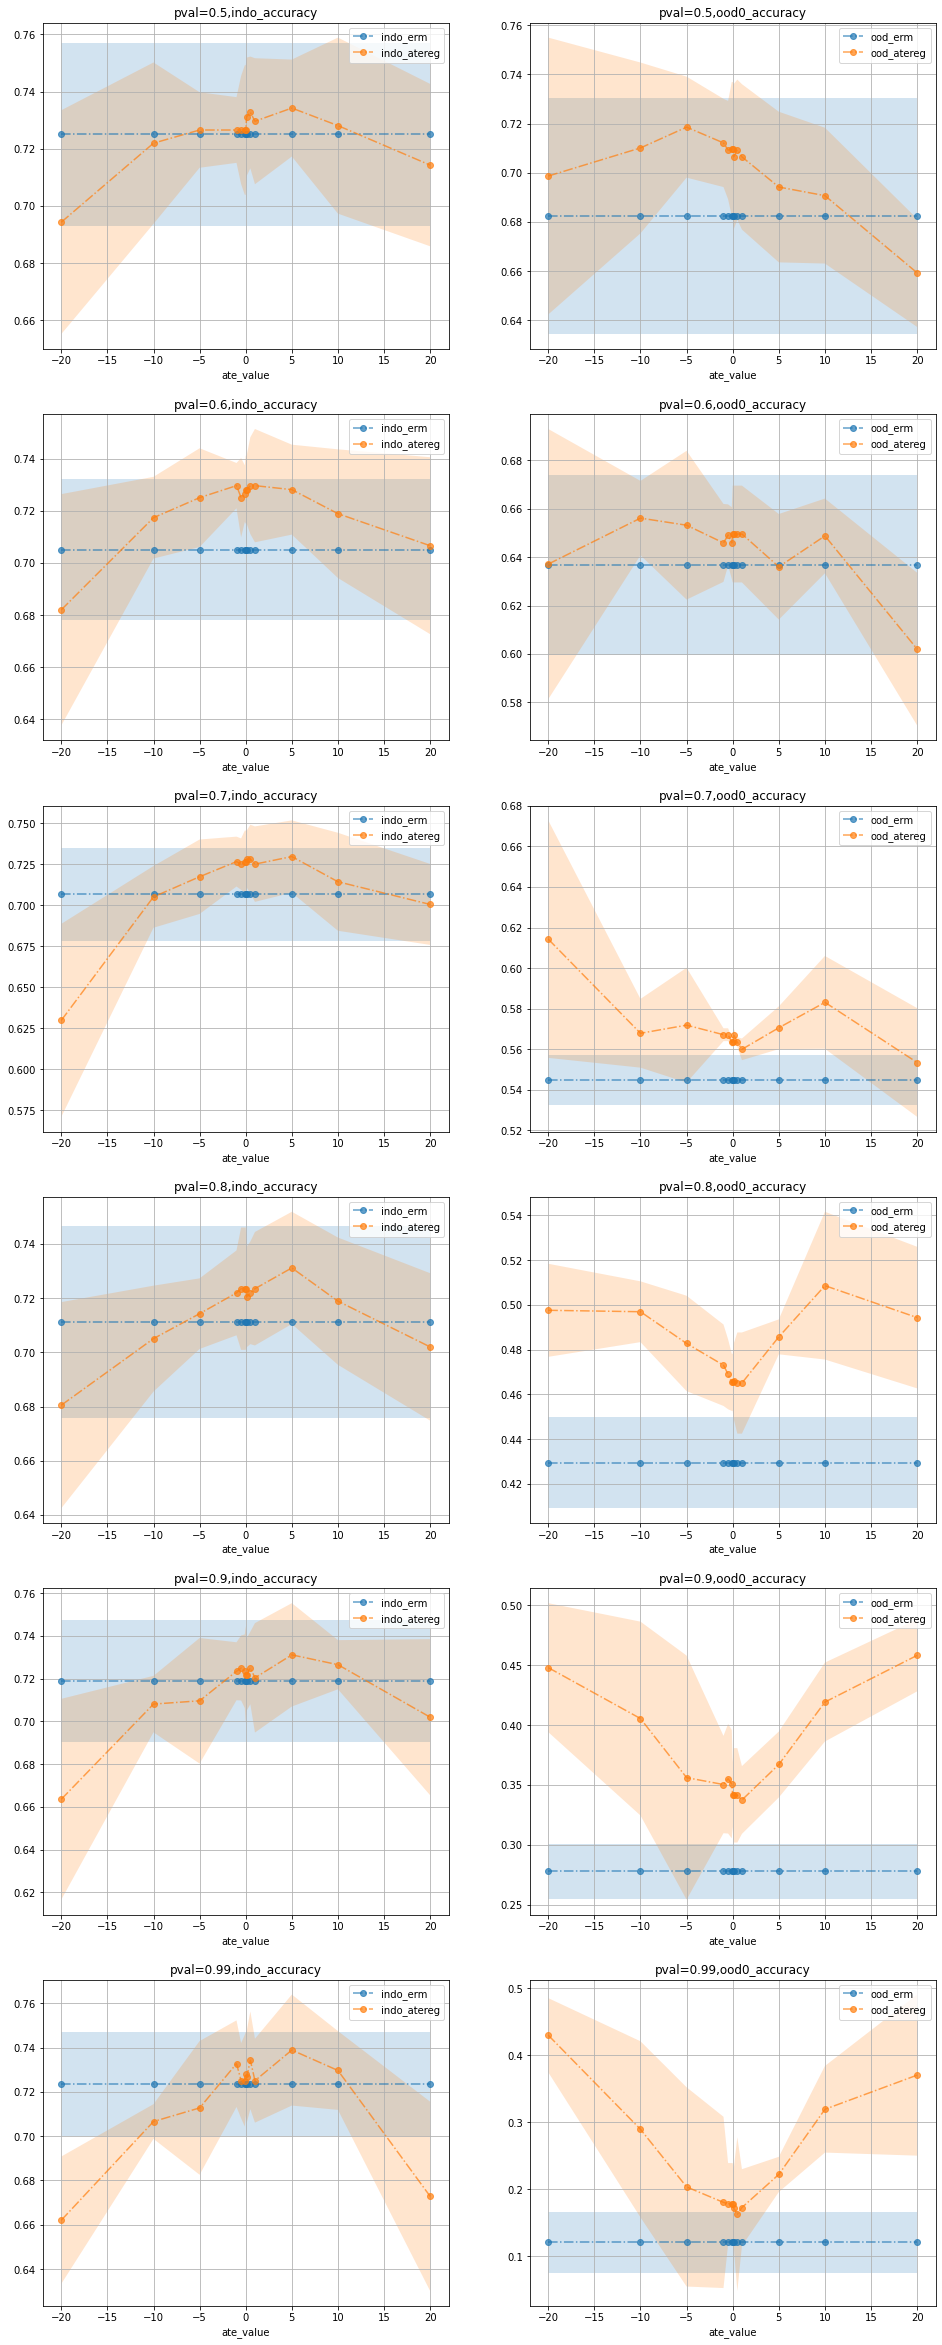

In [38]:
run_list=[10,11,12]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = [-0.005,0.08,0.131,0.21,0.26,0.35]
ate_list_de_loss = [-0.017,0.07,0.12,0.21,0.3,0.26]
ate_list_dr_acc = [0.01,0.05,0.15,0.18,0.22,0.24]
ate_list_dr_loss = [0.03,0.03,0.127,0.197,0.22,0.24]

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [-0.0002,0.124,0.0006,0.008,0.06,0.35]
ate_list_sel_dr_acc = [0.01,0.1,0.16,0.26,0.04,0.31]


#alpha and gval section using the loss
ate_list_sel_de_loss = [-0.0001,0.001,0.004,0.01,0.06,0.11]
ate_list_sel_dr_loss = [0.02,0.09,0.19,0.18,0.35,0.29]



ate_sweep_list = [-20.0, -10.0, -5.0, -1.0, -0.5, -0.1, 0.0, 0.1, 0.5, 1.0, 5.0,  10.0, 20.0]
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
    ate_list_dr_acc = ate_list_dr_acc,
    ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
    ate_list_sel_de_loss = ate_list_sel_de_loss,
    ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="spurious"
sample=1000
num_topics=1


telambda = 10 #0, 10, 100
noise=0.0

reg_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).erm/probe_metric_list.json"

#Getting the best result for the erm runs
# erm_pval_best_result = plot_one_result_timeline(ax=None,
#                          plot_item_list=None,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dummy,
#                          fname_pattern=erm_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
                             
#                          ),
#                          tidx=None,
#                          title=None,
#                          no_plot_mode=True,
#                          print_best_result=False,
# )

#We have used te_lambda=0 for this experiment though!
dummy_ate_val = 0.0
erm_pval_best_result = plot_one_result_timeline(ax=None,
                         plot_item_list=None,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=[dummy_ate_val,]*len(pval_list),
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             0,#telambda

                         ),
                         tidx=None,
                         title=None,
                         no_plot_mode=True,
                         print_best_result=False,
)

#Getting the best result for every te effect in sweep list
atereg_pval_best_result={}
for ate_val in ate_sweep_list:
    atereg_pval_best_result[ate_val] = plot_one_result_timeline(ax=None,
                                                     plot_item_list=None,
                                                     run_list=run_list,
                                                     pval_list=pval_list,
                                                     ate_list=[ate_val,]*len(pval_list),
                                                     fname_pattern=reg_fname_pattern.format(
                                                                         "{1}",
                                                                         topic_name,
                                                                         sample,
                                                                         noise,
                                                                         "{0}",
                                                                         "{2}",
                                                                         telambda,

                                                     ),
                                                     tidx=None,
                                                     title=None,
                                                     no_plot_mode=True,
                                                     print_best_result=False,
    )



num_cols = num_topics+1 #assuming trained combined so only one indo
plt.rcParams['figure.figsize'] = [8*num_cols, 7*len(pval_list)]
fig,ax = plt.subplots(len(pval_list),num_cols)
#Plotting each of the variation for the pval
for pidx,pval in enumerate(pval_list):
    #Plotting the indo for the erm
    erm_best_indo = np.array([erm_pval_best_result[pval]["indo"]]*len(ate_sweep_list))
    erm_best_indo_std = np.array([erm_pval_best_result[pval]["indo_std"]]*len(ate_sweep_list))
    ax[pidx,0].plot(ate_sweep_list,erm_best_indo,ls="-.",marker="o",alpha=0.7,label="indo_erm")
    ax[pidx,0].fill_between(ate_sweep_list,erm_best_indo-erm_best_indo_std,erm_best_indo+erm_best_indo_std,alpha=0.2)
    
    #Creating the varation of best indo and ood acc for each of the ate val
    atereg_best_indo = np.array([atereg_pval_best_result[ate_val][pval]["indo"] for ate_val in ate_sweep_list])
    atereg_best_indo_std = np.array([atereg_pval_best_result[ate_val][pval]["indo_std"] for ate_val in ate_sweep_list])
    ax[pidx,0].plot(ate_sweep_list,atereg_best_indo,ls="-.",marker="o",alpha=0.7,label="indo_atereg")
    ax[pidx,0].fill_between(ate_sweep_list,atereg_best_indo-atereg_best_indo_std,atereg_best_indo+atereg_best_indo_std,alpha=0.2)
    
    ax[pidx,0].set_title("pval={},indo_accuracy".format(pval))
    ax[pidx,0].set_xlabel("ate_value")
    ax[pidx,0].legend()
    ax[pidx,0].grid(True)
#     ax[pidx,0].set_ylim(0.5,0.9)
    
    for tidx in range(0,num_cols-1):
        #Plotting the ondo for the erm
        erm_best_ood = np.array([erm_pval_best_result[pval]["ood{}".format(tidx)]]*len(ate_sweep_list))
        erm_best_ood_std = np.array([erm_pval_best_result[pval]["ood{}_std".format(tidx)]]*len(ate_sweep_list))
        ax[pidx,tidx+1].plot(ate_sweep_list,erm_best_ood,ls="-.",marker="o",alpha=0.7,label="ood_erm")
        ax[pidx,tidx+1].fill_between(ate_sweep_list,erm_best_ood-erm_best_ood_std,erm_best_ood+erm_best_ood_std,alpha=0.2)

        #Creating the varation of best indo and ood acc for each of the ate val
        atereg_best_ood = np.array([atereg_pval_best_result[ate_val][pval]["ood{}".format(tidx)] for ate_val in ate_sweep_list])
        atereg_best_ood_std = np.array([atereg_pval_best_result[ate_val][pval]["ood{}_std".format(tidx)] for ate_val in ate_sweep_list])
        ax[pidx,tidx+1].plot(ate_sweep_list,atereg_best_ood,ls="-.",marker="o",alpha=0.7,label="ood_atereg")
        ax[pidx,tidx+1].fill_between(ate_sweep_list,atereg_best_ood-atereg_best_ood_std,atereg_best_ood+atereg_best_ood_std,alpha=0.2)
        
        yllim=0.0
        yulim=1.01
        
        #Marking the location of diffrent ate estimates
#         for ate_name, ate_list in ate_list_dict.items():
#             yval_line = np.arange(yllim,yulim,0.1)
#             xval_mark = [ate_list[pidx]]*yval_line.shape[0]
            
#             #Marking the ate as the vertical line
#             ax[pidx,tidx+1].plot(xval_mark,yval_line,ls="-.",label=ate_name)
#             ax[pidx,0].plot(xval_mark,yval_line,ls="-.",label=ate_name)
    
        ax[pidx,tidx+1].set_title("pval={},ood{}_accuracy".format(pval,tidx))
        ax[pidx,tidx+1].set_xlabel("ate_value")
        ax[pidx,tidx+1].legend()
        ax[pidx,tidx+1].grid(True)
#         ax[pidx,tidx+1].set_ylim(yllim,yulim)
#         ax[pidx,0].set_ylim(yllim,yulim)
    
plt.show()

## Strategy 2: Ranking experiment (match with absolute TE)

NameError: name 'ate_list_dummy' is not defined

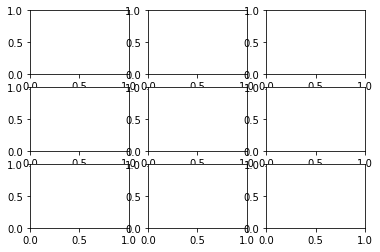

In [6]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9]
ate_list_true = [0.45,0.54,0.58,"0.60",0.69] #correct one
ate_list_dr = [0.05 ,0.25 ,0.45 ,0.4 ,0.6] #DR with correct masking

topic_name="food"
sample=350


telambda = 1
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),3)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG DR",
)

In [ ]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.15,0.175,0.2,0.27,0.32] #correct one
ate_list_dr = [0.3 ,0.1 ,0.2 ,0.48 ,0.4] #DR with correct masking


topic_name="service"
sample=200


telambda = 1
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),3)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG DR",
)

NameError: name 'ate_list_dummy' is not defined

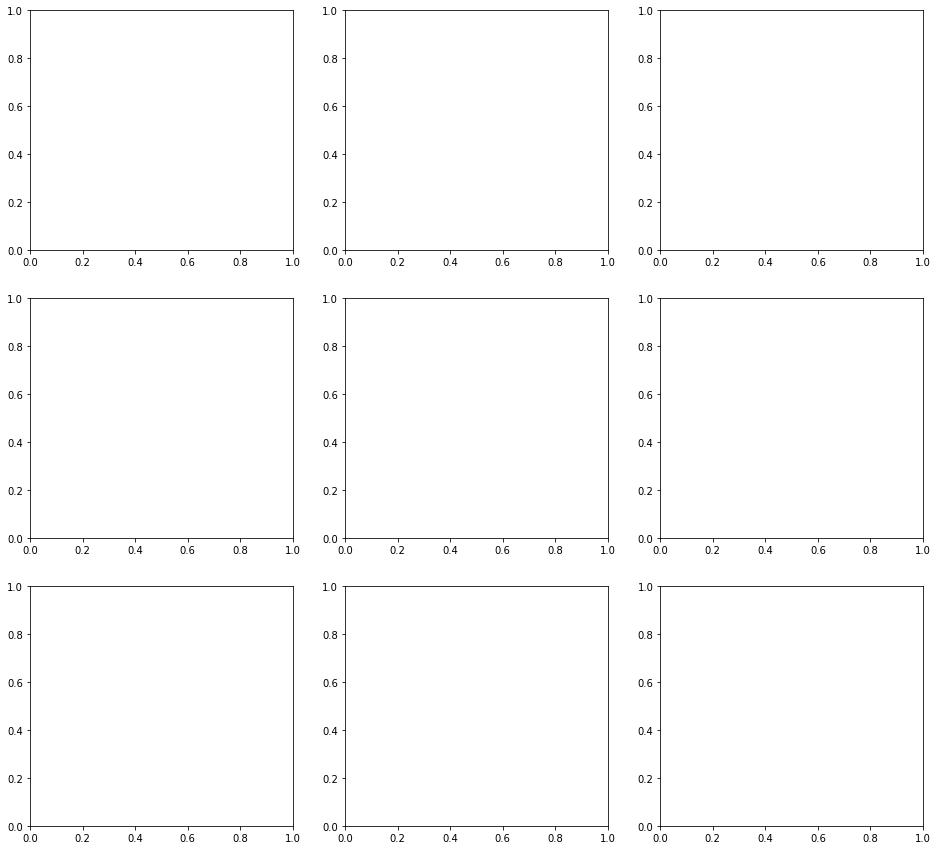

In [7]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8]
ate_list_true = [0.15,0.2,0.21,0.22] #correct one
ate_list_dr = [0.62,0.3,0.12,0.25] #DR with correct masking



topic_name="ambiance"
sample=100


telambda = 10
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),3)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG DR",
)

In [ ]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8]
ate_list_true = [0.1,0.125,0.12,0.2] #correct one
ate_list_dr = [0.0,0.0,0.65,0.25] #DR with correct masking



topic_name="noise"
sample=50


telambda = 1
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),3)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG DR",
)

## With symmetrization of cebab dataset

Getting the best setting for pval:inf


best loc : 2
overall_avg_acc:  1.57
best indo: 0.86
best ood0 : 0.71
Getting the best setting for pval:inf


best loc : 0
overall_avg_acc:  1.53
best indo: 0.85
best ood0 : 0.68
Getting the best setting for pval:inf


best loc : 0
overall_avg_acc:  1.53
best indo: 0.85
best ood0 : 0.68


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/cebab/nlp_logs/cad.cebabs2.rnum(0).topic(food).sample(500).noise(0.1).pval(inf).t0_ate(0.55).telambda(1)/probe_metric_list.json'

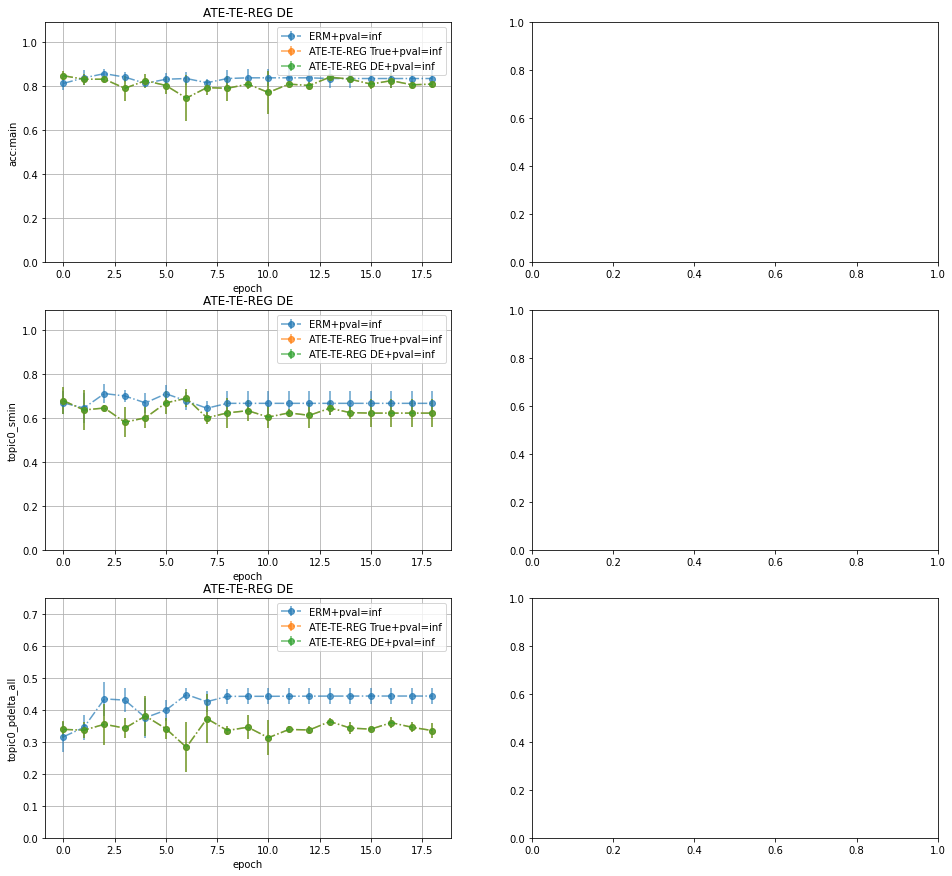

In [68]:
run_list=[0,1,2]
pval_list=["inf"]
ate_list_true = [0.42,] #correct one
# ate_list_de = [0.45,] #direct effect
# ate_list_dr = [0.5,] #DR with correct masking
ate_list_de = [0.42,] #direct effect
ate_list_dr = [0.55,] #DR with correct masking

topic_name="food" #"food",1100 "ambiance",700 "service",900 "noise",500
sample=500#1100


telambda = 1
noise=0.1 #0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"
erm_noise_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),2)

if noise==0.0:
    plot_one_result_timeline(ax=ax,
                             plot_item_list=plot_item_list,
                             run_list=run_list,
                             pval_list=pval_list,
                             ate_list=ate_list_dummy,
                             fname_pattern=erm_fname_pattern.format(
                                                 "{1}",
                                                 topic_name,
                                                 sample,
                                                 "{0}",

                             ),
                             tidx=0,
                             title="ERM",
    )
else:
    plot_one_result_timeline(ax=ax,
                             plot_item_list=plot_item_list,
                             run_list=run_list,
                             pval_list=pval_list,
                             ate_list=ate_list_dummy,
                             fname_pattern=erm_noise_fname_pattern.format(
                                                 "{1}",
                                                 topic_name,
                                                 sample,
                                                 noise,
                                                 "{0}",

                             ),
                             tidx=0,
                             title="ERM",
    )


plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_de,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DE",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DR",
)

Getting the best setting for pval:inf


best loc : 3
overall_avg_acc:  1.95
best indo: 0.97
best ood0 : 0.98


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/cebab/nlp_logs/cad.cebabs2.rnum(0).topic(service).sample(460).noise(0.1).pval(inf).t0_ate(0.16).telambda(1)/probe_metric_list.json'

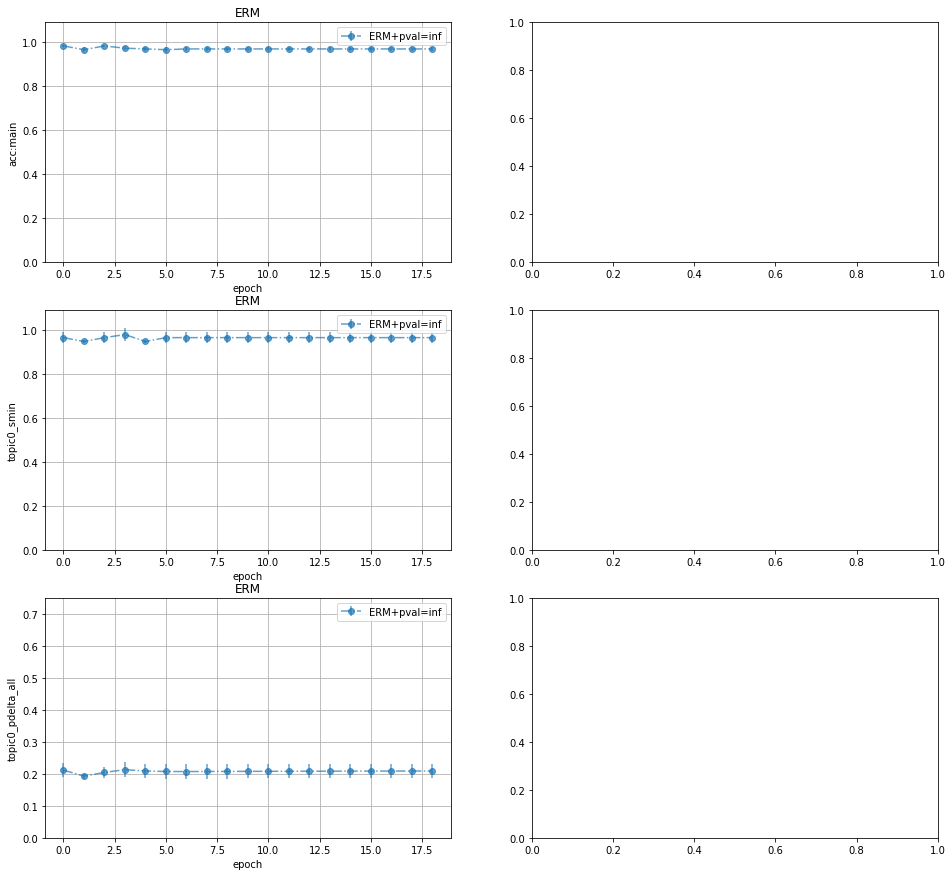

In [66]:
run_list=[0,1,2]
pval_list=["inf"]
ate_list_true = [0.16,] #correct one
# ate_list_de = [0.24,] #direct effect
# ate_list_dr = ["0.20",] #DR with correct masking
ate_list_de = [0.4,] #direct effect
ate_list_dr = ["0.32",] #DR with correct masking

topic_name="service" #"food",1100 "ambiance",700 "service",900 "noise",500
sample=460#900


telambda = 1
noise=0.1
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),2)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_de,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DE",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DR",
)

Getting the best setting for pval:inf


best loc : 5
overall_avg_acc:  1.86
best indo: 0.96
best ood0 : 0.9


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/cebab/nlp_logs/cad.cebabs2.rnum(0).topic(ambiance).sample(340).noise(0.1).pval(inf).t0_ate(0.07).telambda(1)/probe_metric_list.json'

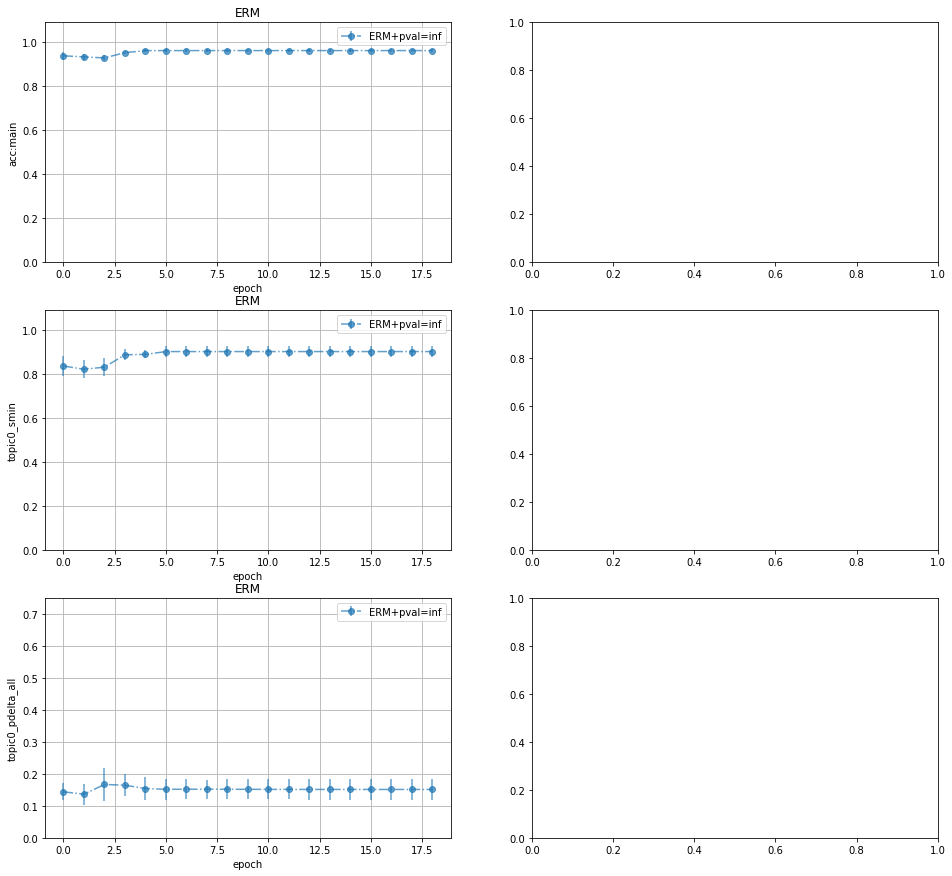

In [69]:
run_list=[0,1,2]
pval_list=["inf"]
ate_list_true = [0.07,] #correct one
# ate_list_de = [0.0,] #direct effect
# ate_list_dr = ["0.04",] #DR with correct masking
ate_list_de = [0.09,] #direct effect
ate_list_dr = ["0.15",] #DR with correct masking

topic_name="ambiance" #"food",1100 "ambiance",700 "service",900 "noise",500
sample=340 #700


telambda = 1
noise=0.1
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),2)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_de,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DE",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DR",
)

Getting the best setting for pval:inf


best loc : 7
overall_avg_acc:  1.93
best indo: 0.95
best ood0 : 0.97


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/cebab/nlp_logs/cad.cebabs2.rnum(0).topic(noise).sample(320).noise(0.1).pval(inf).t0_ate(-0.04).telambda(1)/probe_metric_list.json'

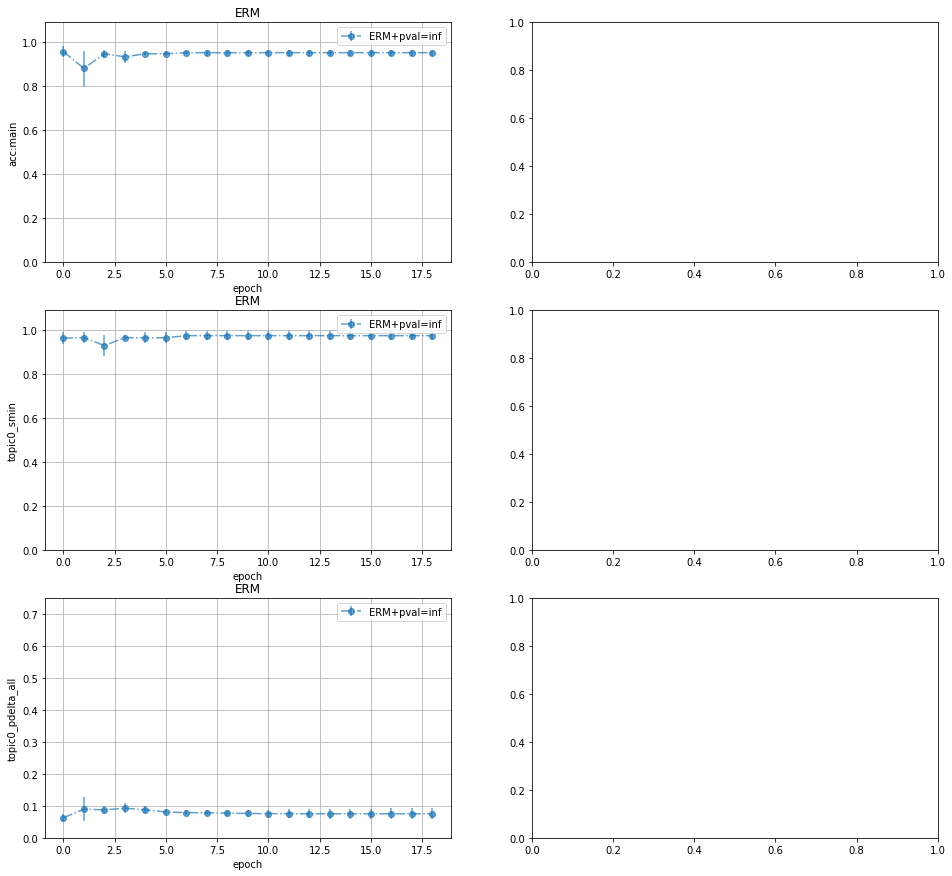

Bad pipe message: %s [b'\xfc\x94']
Bad pipe message: %s [b"\xd4\x00\r0\x81\xe3\xce\x16\xb9sf\xd6\x80T\x99\xa3\x11U\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14"]
Bad pipe message: %s [b"\x89xwfm\xa4G\x95\x90\x06_<'\xb3\xefF\x9a\xbe\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0", b"+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0s\xc0w\x00\xc4\x00\xc3\xc0#\xc0'\x00g\x00@\xc0r\xc0v\x00\xbe\x00\xbd\xc0\n\xc0\x14\x009\x008\x00\x88\x00\x87\xc0\t\xc0\x13\x003\x002\x00\x9a\x00\x99\x00E\x00"]
Bad pipe message: %s [b'\x07\xc0\x11\xc0\x08\xc0\x12\x00\x16\x00\x13\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00\xc0\x00<\x00\xba\x005\x00\x84\x00/\x00\x96\x00A\x00\x05\x

In [70]:
run_list=[0,1,2]
pval_list=["inf"]
ate_list_true = [-0.04,] #correct one
# ate_list_de = [0.38,] #direct effect
# ate_list_dr = ["0.04",] #DR with correct masking
ate_list_de = [0.62,] #direct effect
ate_list_dr = ["0.40",] #DR with correct masking

topic_name="noise" #"food",1100 "ambiance",700 "service",900 "noise",500
sample=320 #500


telambda = 1
noise=0.1
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),2)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_de,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DE",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DR",
)

## Combined cebab runs

Getting the best setting for pval:inf


best loc : 1
overall_avg_acc:  0.99
best indo: 0.86
best ood0 : 0.7
best ood1 : 0.66
best ood2 : 0.87
best ood3 : 0.85
Getting the best setting for pval:inf


best loc : 0
overall_avg_acc:  0.99
best indo: 0.87
best ood0 : 0.7
best ood1 : 0.68
best ood2 : 0.86
best ood3 : 0.87
Getting the best setting for pval:inf


best loc : 2
overall_avg_acc:  0.98
best indo: 0.86
best ood0 : 0.72
best ood1 : 0.69
best ood2 : 0.82
best ood3 : 0.85
Getting the best setting for pval:inf


best loc : 3
overall_avg_acc:  0.98
best indo: 0.84
best ood0 : 0.69
best ood1 : 0.66
best ood2 : 0.84
best ood3 : 0.87


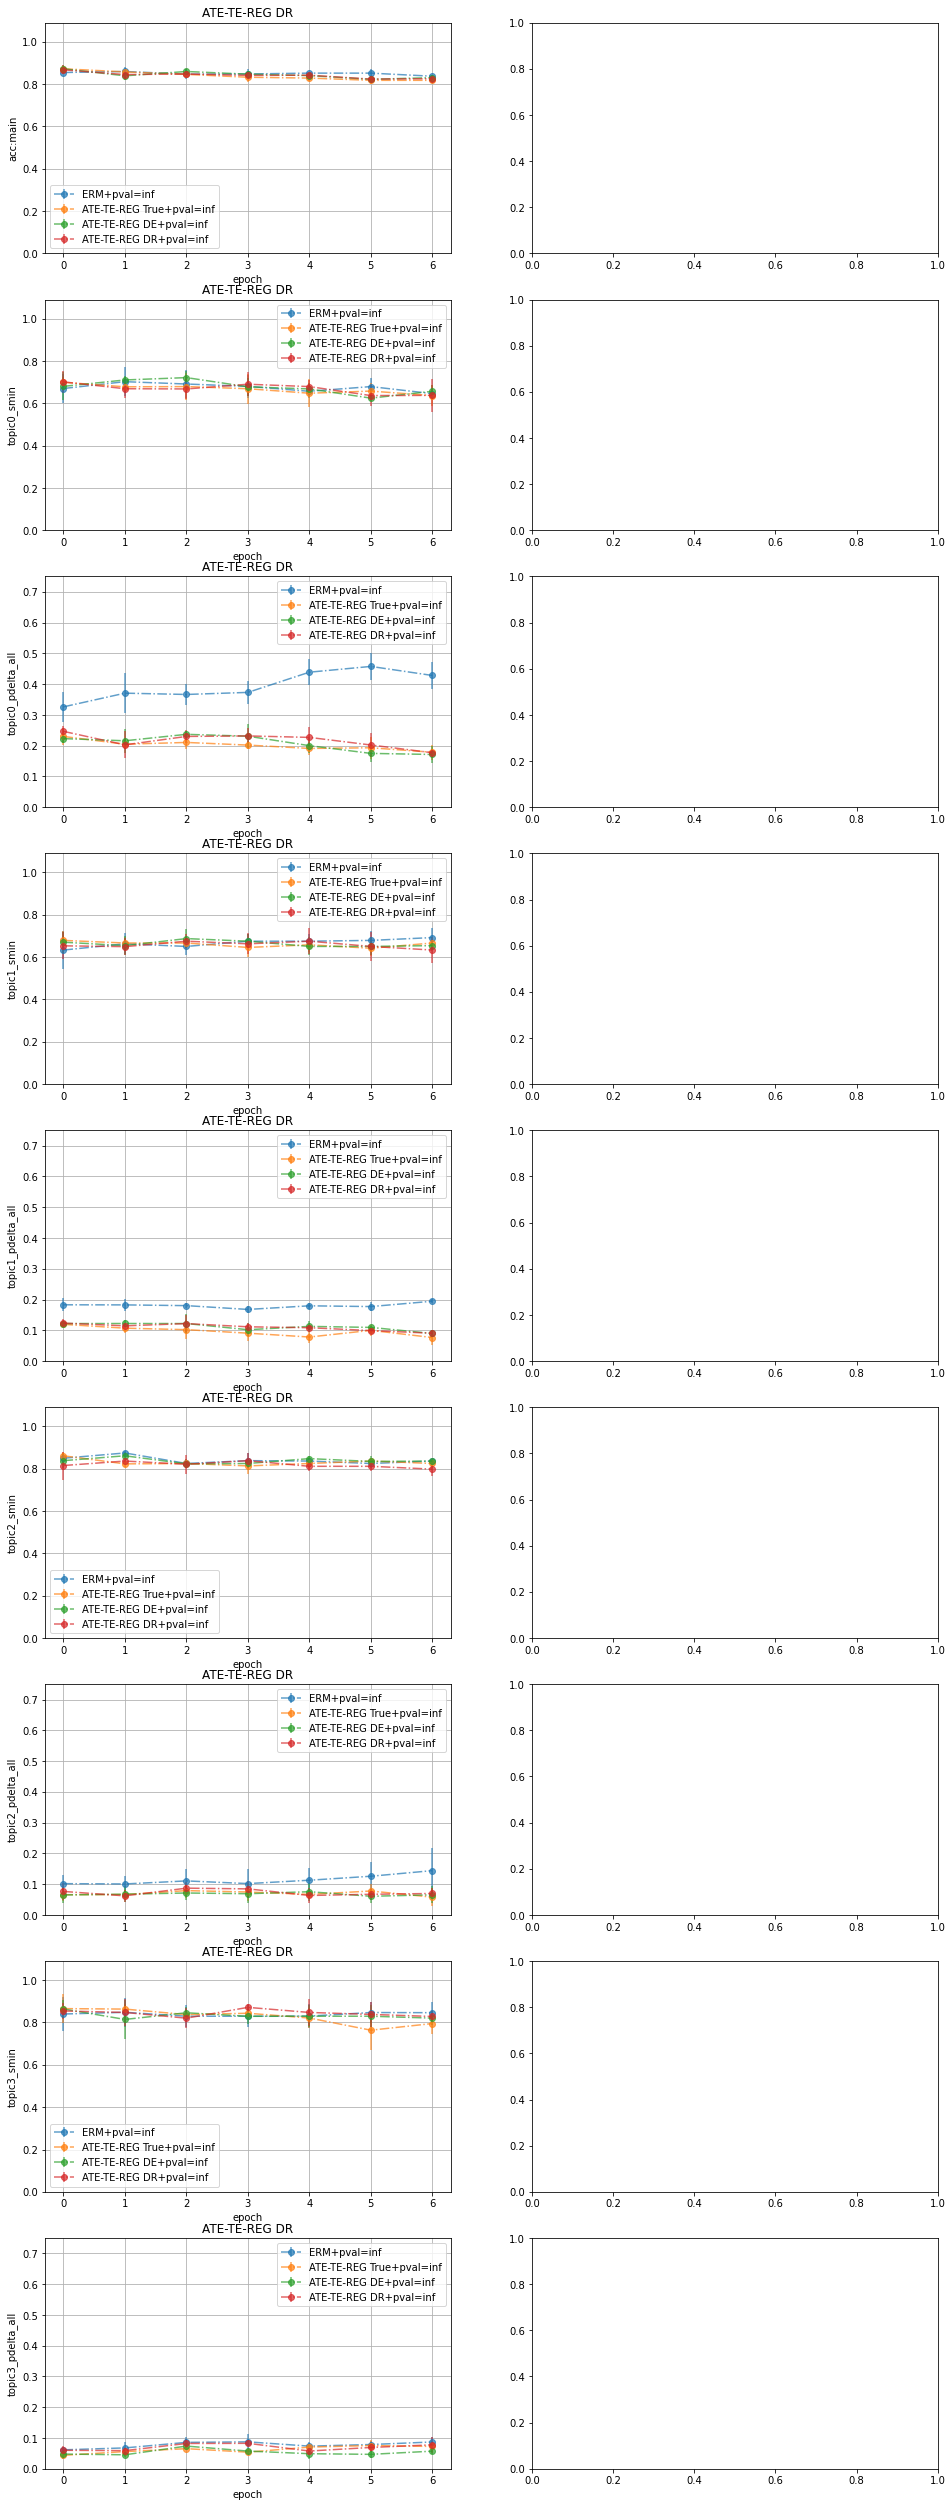

In [64]:
run_list=[0,1,2]
pval_list=["inf"]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = ["true",] #correct one
ate_list_de = ["de",] #direct effect
ate_list_dr = ["dr",] #DR with correct masking

topic_name="all" #"food",1100 "ambiance",700 "service",900 "noise",500
sample="nosymm" #1100


telambda = 1 #1 10
noise=0.1 #0.0
num_topics=4
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
            "topic1_smin",
            "topic1_pdelta_all",
            "topic2_smin",
            "topic2_pdelta_all",
            "topic3_smin",
            "topic3_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab_all/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab_all/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"
erm_noise_fname_pattern="dataset/cebab_all/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),2)



plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_noise_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",

                         ),
                         tidx=0,
                         title="ERM",
                         num_topics=num_topics,
                         plot_upto=7,
)


plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG True",
                         num_topics=num_topics,
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_de,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DE",
                         num_topics=num_topics,
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DR",
                         num_topics=num_topics,
)

# CivilComments Dataset

Getting the best setting for pval:0.5


best loc : 4
overall_avg_acc:  1.61
best indo: 0.81
best ood0 : 0.8
Getting the best setting for pval:0.6


best loc : 6
overall_avg_acc:  1.55
best indo: 0.81
best ood0 : 0.74
Getting the best setting for pval:0.7


best loc : 2
overall_avg_acc:  1.54
best indo: 0.8
best ood0 : 0.74
Getting the best setting for pval:0.8


best loc : 2
overall_avg_acc:  1.43
best indo: 0.81
best ood0 : 0.62
Getting the best setting for pval:0.9


best loc : 3
overall_avg_acc:  1.36
best indo: 0.86
best ood0 : 0.5
Getting the best setting for pval:0.99


best loc : 3
overall_avg_acc:  1.32
best indo: 0.93
best ood0 : 0.4
Getting the best setting for pval:0.5


best loc : 0
overall_avg_acc:  1.63
best indo: 0.81
best ood0 : 0.82
Getting the best setting for pval:0.6


best loc : 2
overall_avg_acc:  1.59
best indo: 0.81
best ood0 : 0.78
Getting the best setting for pval:0.7


best loc : 2
overall_avg_acc:  1.53
best indo: 0.8
best ood0 : 0.74
Getting the best settin

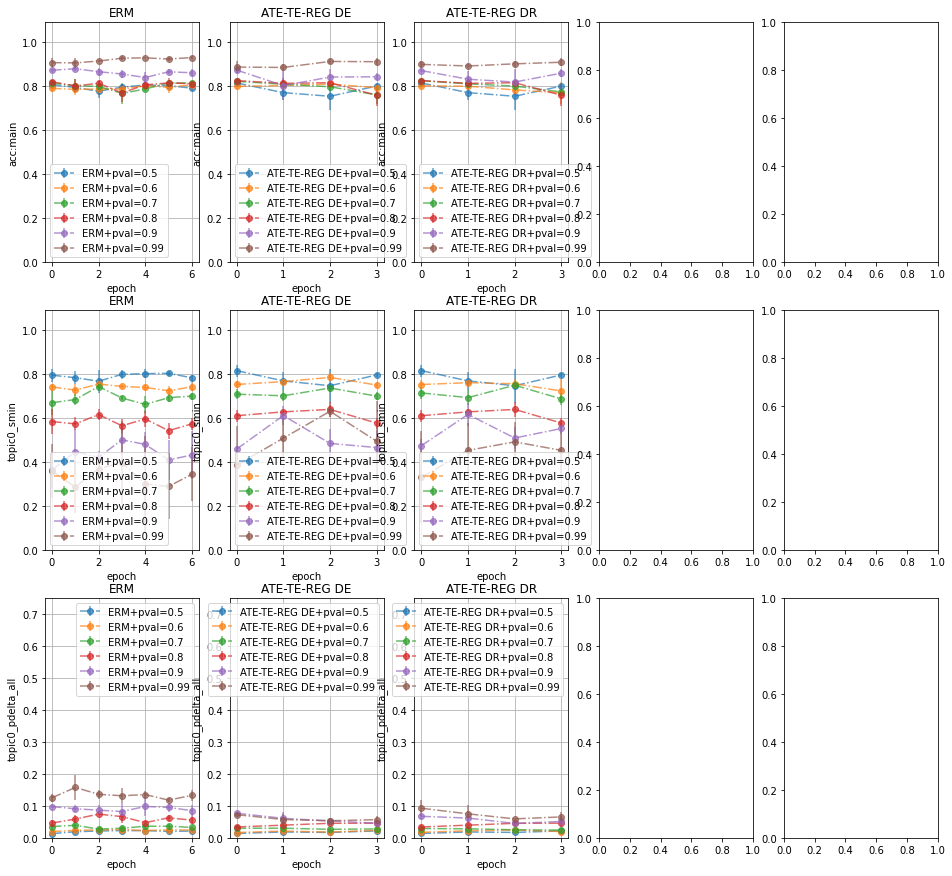

In [57]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.05, 0.02, 0.05, 0.05, 0.15, 0.1] #correct one
ate_list_dr = [0.05,0.04,0.04,0.05,0.11,0.15] #DR with correct masking
ate_list_random1 = [0.66,0.46,0.13,0.67,0.25,0.24]
ate_list_random2 = ["0.20",0.43,0.18,0.07,"0.30",0.27]


topic_name="gender"
sample=5000


telambda = 1
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),5)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG DE",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG DR",
)
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=[0,],
#                          pval_list=pval_list,
#                          ate_list=ate_list_random1,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=3,
#                          title="ATE-TE-REG RDM1",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=[0,],
#                          pval_list=pval_list,
#                          ate_list=ate_list_random2,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=4,
#                          title="ATE-TE-REG RDM2",
# )

Getting the best setting for pval:0.5


best loc : 4
overall_avg_acc:  1.57
best indo: 0.77
best ood0 : 0.79
Getting the best setting for pval:0.6


best loc : 0
overall_avg_acc:  1.52
best indo: 0.78
best ood0 : 0.75
Getting the best setting for pval:0.7


best loc : 4
overall_avg_acc:  1.46
best indo: 0.79
best ood0 : 0.67
Getting the best setting for pval:0.8


best loc : 3
overall_avg_acc:  1.36
best indo: 0.8
best ood0 : 0.56
Getting the best setting for pval:0.9


best loc : 3
overall_avg_acc:  1.26
best indo: 0.85
best ood0 : 0.41
Getting the best setting for pval:0.99


best loc : 4
overall_avg_acc:  1.23
best indo: 0.94
best ood0 : 0.29
Getting the best setting for pval:0.5


best loc : 0
overall_avg_acc:  1.57
best indo: 0.77
best ood0 : 0.8
Getting the best setting for pval:0.6


best loc : 0
overall_avg_acc:  1.52
best indo: 0.77
best ood0 : 0.75
Getting the best setting for pval:0.7


best loc : 0
overall_avg_acc:  1.45
best indo: 0.81
best ood0 : 0.64
Getting the best set

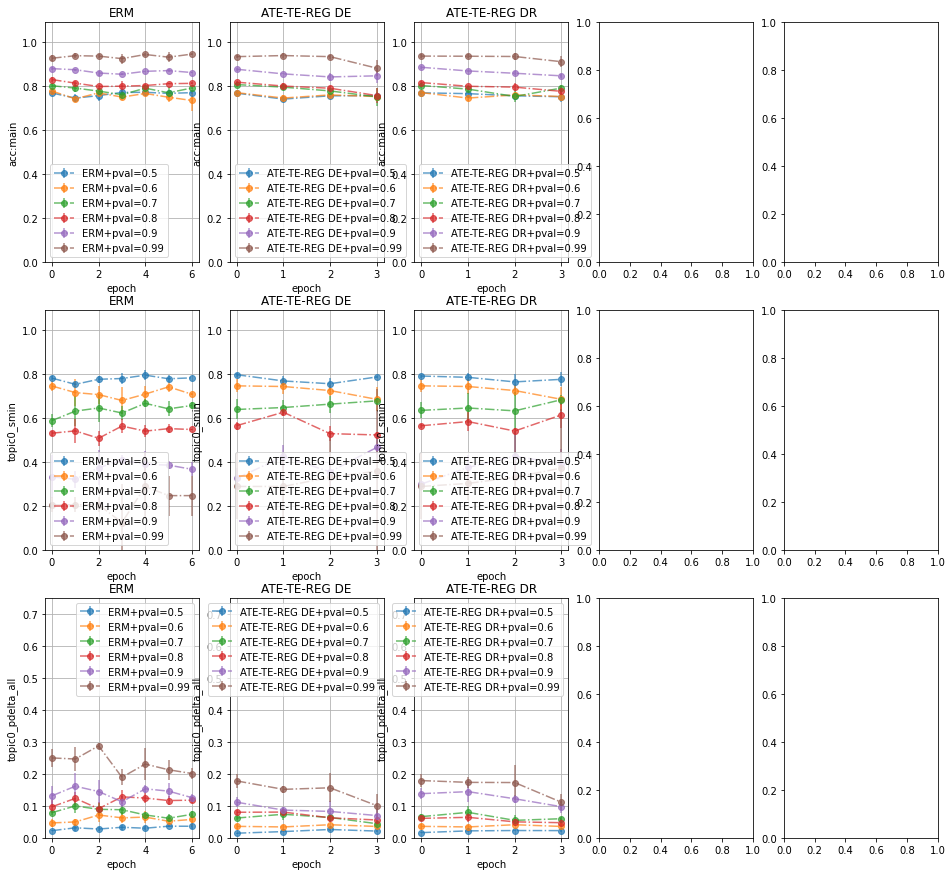

In [58]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [-0.03,0.06,0.1,0.2,0.18,0.21] #correct one
ate_list_dr = [-0.01,0.06,0.12,0.05,0.3,0.24] #DR with correct masking
ate_list_random1 = [0.66,0.46,0.13,0.67,0.25,0.24]
ate_list_random2 = ["0.20",0.43,0.18,0.07,"0.30",0.27]


topic_name="race"
sample=5000


telambda = 1
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),5)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG DE",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG DR",
)
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_random1,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=3,
#                          title="ATE-TE-REG RDM1",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_random2,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=4,
#                          title="ATE-TE-REG RDM2",
# )

Getting the best setting for pval:0.5


best loc : 0
overall_avg_acc:  1.66
best indo: 0.81
best ood0 : 0.84
Getting the best setting for pval:0.6


best loc : 0
overall_avg_acc:  1.6
best indo: 0.81
best ood0 : 0.79
Getting the best setting for pval:0.7


best loc : 5
overall_avg_acc:  1.58
best indo: 0.81
best ood0 : 0.76
Getting the best setting for pval:0.8


best loc : 4
overall_avg_acc:  1.41
best indo: 0.82
best ood0 : 0.59
Getting the best setting for pval:0.9


best loc : 2
overall_avg_acc:  1.35
best indo: 0.88
best ood0 : 0.47
Getting the best setting for pval:0.99


best loc : 1
overall_avg_acc:  1.12
best indo: 0.93
best ood0 : 0.19
Getting the best setting for pval:0.5


best loc : 0
overall_avg_acc:  1.66
best indo: 0.82
best ood0 : 0.84
Getting the best setting for pval:0.6


best loc : 0
overall_avg_acc:  1.61
best indo: 0.82
best ood0 : 0.79
Getting the best setting for pval:0.7


best loc : 0
overall_avg_acc:  1.51
best indo: 0.81
best ood0 : 0.7
Getting the best set

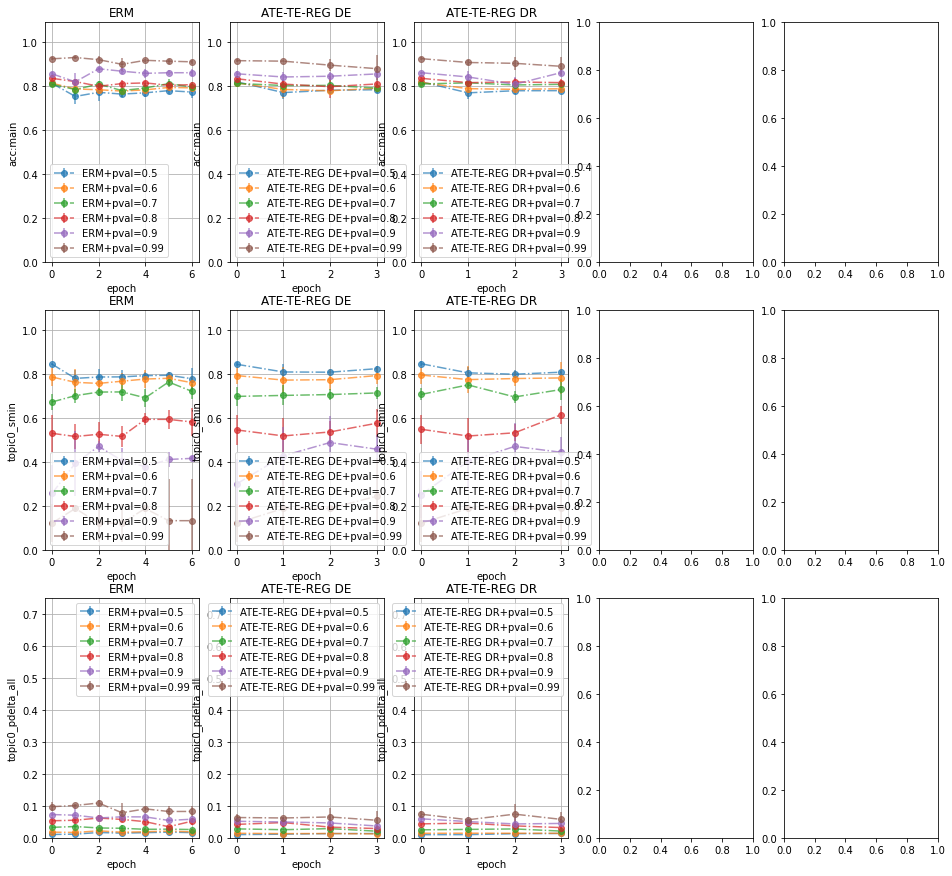

Bad pipe message: %s [b'\xd5\xa9\xd8\x86\xb6\x17|\xbe\xfba\x96o%\xf7z\xe4\x06\x1b\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad', b"\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0s\xc0w\x00\xc4\x00\xc3\xc0#\xc0'\x00g\x00@\xc0r\xc0v\x00\xbe\x00\xbd\xc0\n\xc0\x14\x009\x008\x00\x88\x00\x87\xc0\t\xc0\x13\x003\x002\x00\x9a\x00\x99\x00E\x00D\xc0\x07\xc0\x11\xc0\x08\xc0\x12\x00\x16\x00\x13\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00\xc0\x00<\x00\xba\x005\x00\x84\x00/\x00\x96\x00A\x00\x05\x00\n\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00", b'#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x000\x00.\x04\x03\x05\x03\x06\x03']
Bad pipe message: %s [b'\x08\x08\x08\t\x08\n\x08', b'\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06']
Bad pipe message: %s [b'', b'\x03

In [59]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0,0.0,0.08,0.05,0.08,0.1] #correct one
ate_list_dr = [0.01,0.02,0.04,0.09,0.09,0.18] #DR with correct masking
ate_list_random1 = [0.66,0.46,0.13,0.67,0.25,0.24]
ate_list_random2 = ["0.20",0.43,0.18,0.07,"0.30",0.27]


topic_name="religion"
sample=4000


telambda = 1
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),5)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG DE",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG DR",
)
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_random1,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=3,
#                          title="ATE-TE-REG RDM1",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_random2,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=4,
#                          title="ATE-TE-REG RDM2",
# )

## Sweep on the ate effect

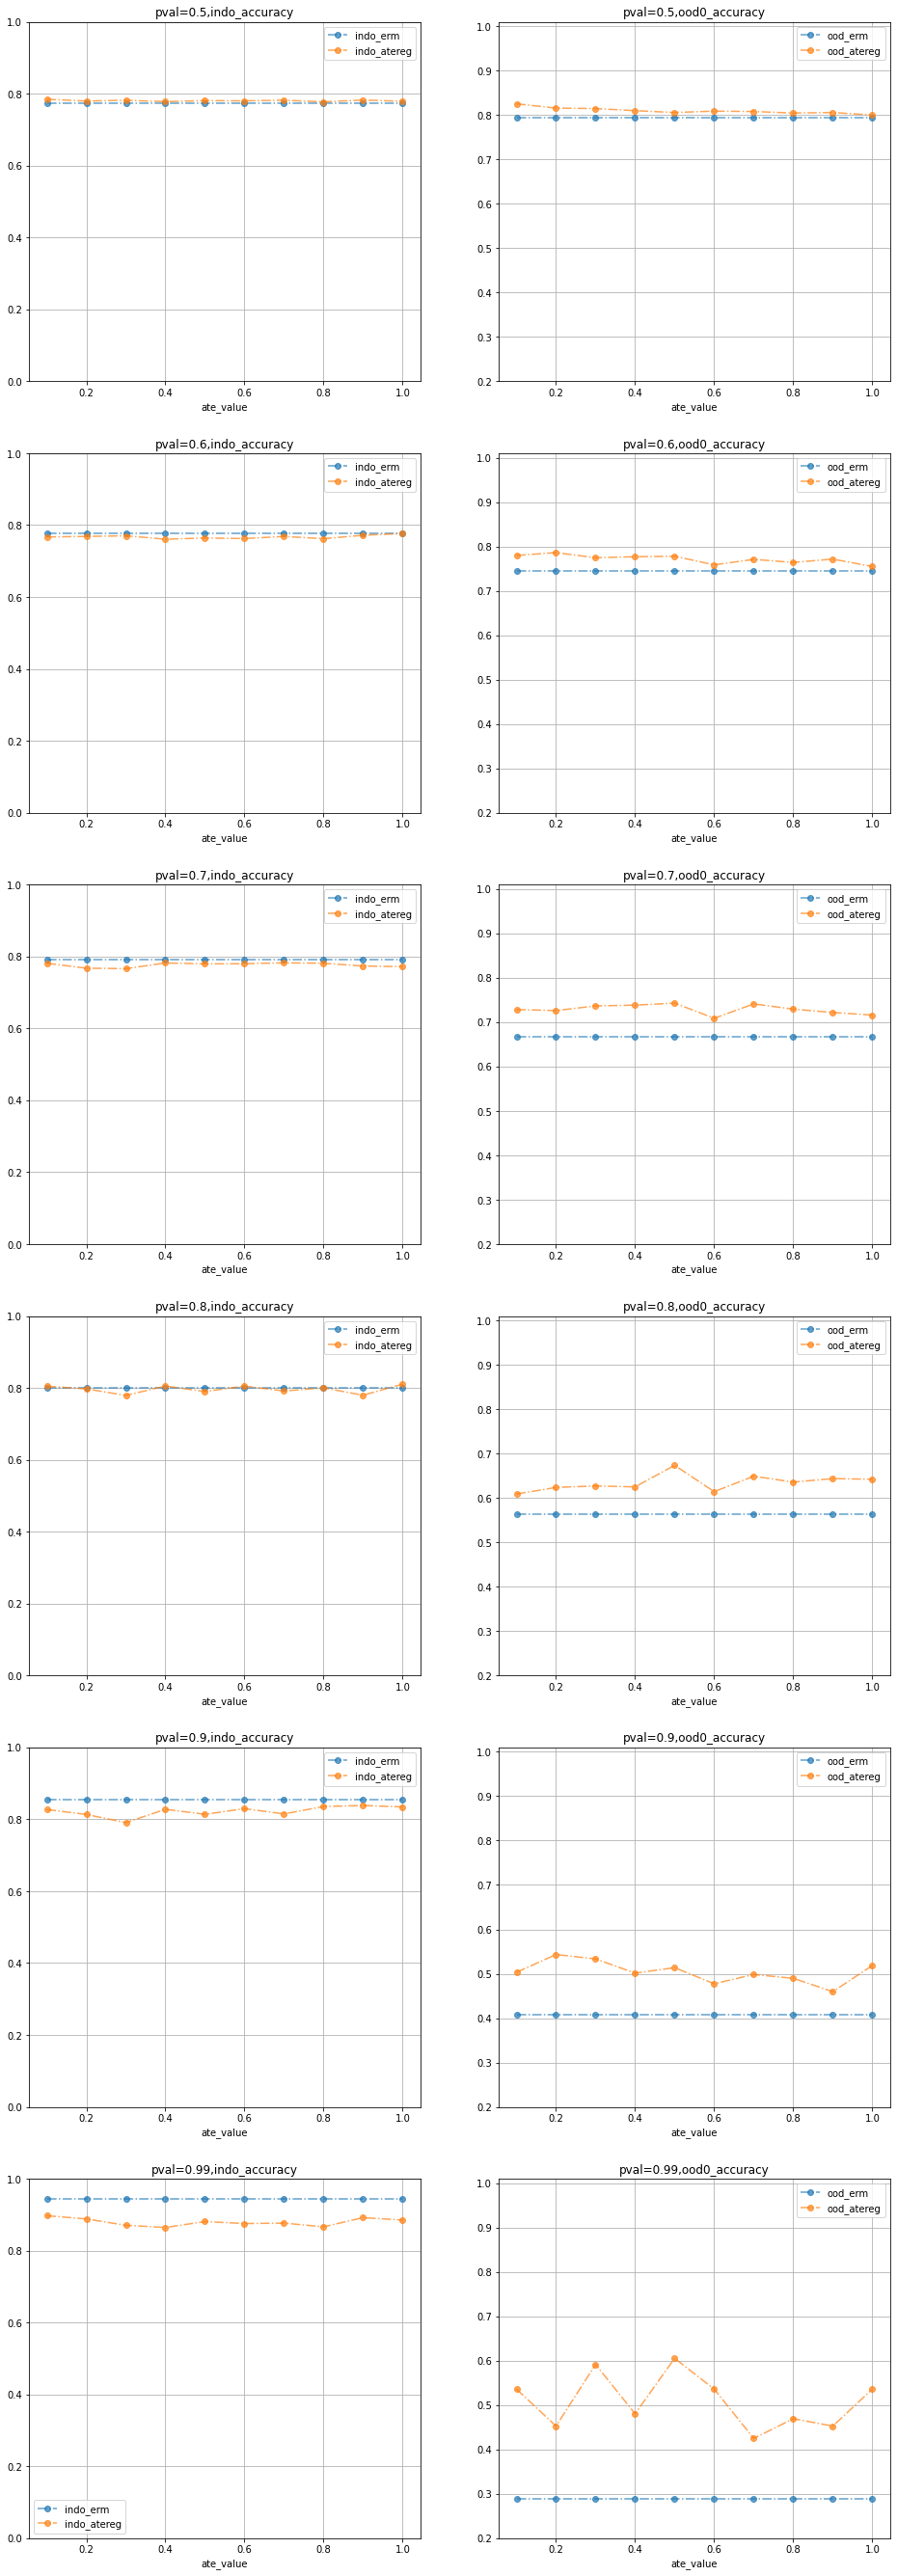

Bad pipe message: %s [b"\xd9:Y\xce3<\xb4\xbe\x89\xaa\xcb%z\xf1\xef\xd2H\x99 G\x17\xc9\x086o\x12v\x86\x82\xad\x89\xd7\xda7V|\xe9\xfc\xc3\xde\xb6}/\t\x02'\x9f^8\x83\xa6\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00", b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 mhDgl\xf2\xf6\x8cm\x0bX\x9b\xd2\x12\x8f6\xc6\x9d(2\x06\xb2']
Bad pipe message: %s [b"N\xb0H\x18\xc7\x16c\xbfz\x87\x99\xa3\x85D\xb9\xe8\x17\x02\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x0

Bad pipe message: %s [b's\xab\xb1I\xefz\xf8\xf1\xf3\xb5\xf7\n\xd3\xbf\xa6\xdc6\xdf ', b'\xfd^\xd3\x06\xc6\xack\xf4\xb1A\x1a\xa3\x0c)\xa8\xdd\x81\xeb\xb8\xb7E\x9b\xb3']
Bad pipe message: %s [b'\x047\x1cl\xbd\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05']
Bad pipe message: %s [b'\x04\x01\x05\x01\x06\x01\x00']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \xb7\xb3\xdeD\x91\x87\xf4\xa8\x81(\xf55kQ\xb2\xffw\xa2rN\xf5;']
Bad pipe message: %s [b'', b'\x968\xd1\xdd\x01s\xfd\xec\xf3\xbd\x1bT6\xe7\xc0< \xdf4\x97i\r\xd1`,\xff\xc2\xb8\x13\xe0\x9c\xc3\x97\xac\x04X\xe4\xac\x9b\xd1}\xc3\x13Llx\x1b:\xfe\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x

In [43]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = []
ate_list_de_loss = []
ate_list_dr_acc = []
ate_list_dr_loss = []

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = []
ate_list_sel_dr_acc = []


#alpha and gval section using the loss
ate_list_sel_de_loss = []
ate_list_sel_dr_loss = []

ate_sweep_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#Adding the ate to mark in the sweep plot
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
    ate_list_dr_acc = ate_list_dr_acc,
    ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
    ate_list_sel_de_loss = ate_list_sel_de_loss,
    ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="race"
sample=5000
num_topics=1


telambda = 5
noise=0.0

reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

#Getting the best result for the erm runs
erm_pval_best_result = plot_one_result_timeline(ax=None,
                         plot_item_list=None,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=None,
                         title=None,
                         no_plot_mode=True,
                         print_best_result=False,
)

#Getting the best result for every te effect in sweep list
atereg_pval_best_result={}
for ate_val in ate_sweep_list:
    atereg_pval_best_result[ate_val] = plot_one_result_timeline(ax=None,
                                                     plot_item_list=None,
                                                     run_list=run_list,
                                                     pval_list=pval_list,
                                                     ate_list=[ate_val,]*len(pval_list),
                                                     fname_pattern=reg_fname_pattern.format(
                                                                         "{1}",
                                                                         topic_name,
                                                                         sample,
                                                                         noise,
                                                                         "{0}",
                                                                         "{2}",
                                                                         telambda,

                                                     ),
                                                     tidx=None,
                                                     title=None,
                                                     no_plot_mode=True,
                                                     print_best_result=False,
    )



num_cols = num_topics+1 #assuming trained combined so only one indo
plt.rcParams['figure.figsize'] = [8*num_cols, 8*len(pval_list)]
fig,ax = plt.subplots(len(pval_list),num_cols)
#Plotting each of the variation for the pval
for pidx,pval in enumerate(pval_list):
    #Plotting the indo for the erm
    erm_best_indo = [erm_pval_best_result[pval]["indo"]]*len(ate_sweep_list)
    ax[pidx,0].plot(ate_sweep_list,erm_best_indo,ls="-.",marker="o",alpha=0.7,label="indo_erm")
    
    #Creating the varation of best indo and ood acc for each of the ate val
    atereg_best_indo = [atereg_pval_best_result[ate_val][pval]["indo"] for ate_val in ate_sweep_list]
    ax[pidx,0].plot(ate_sweep_list,atereg_best_indo,ls="-.",marker="o",alpha=0.7,label="indo_atereg")
    
    ax[pidx,0].set_title("pval={},indo_accuracy".format(pval))
    ax[pidx,0].set_xlabel("ate_value")
    ax[pidx,0].legend()
    ax[pidx,0].grid(True)
    ax[pidx,0].set_ylim(0.0,1.0)
    
    for tidx in range(0,num_cols-1):
        #Plotting the indo for the erm
        erm_best_ood = [erm_pval_best_result[pval]["ood{}".format(tidx)]]*len(ate_sweep_list)
        ax[pidx,tidx+1].plot(ate_sweep_list,erm_best_ood,ls="-.",marker="o",alpha=0.7,label="ood_erm")

        #Creating the varation of best indo and ood acc for each of the ate val
        atereg_best_ood = [atereg_pval_best_result[ate_val][pval]["ood{}".format(tidx)] for ate_val in ate_sweep_list]
        ax[pidx,tidx+1].plot(ate_sweep_list,atereg_best_ood,ls="-.",marker="o",alpha=0.7,label="ood_atereg")
        
        
        yllim=0.2
        yulim=1.01
        
        #Marking the location of diffrent ate estimates
#         for ate_name, ate_list in ate_list_dict.items():
#             yval_line = np.arange(yllim,yulim,0.1)
#             xval_mark = [ate_list[pidx]]*yval_line.shape[0]
            
#             #Marking the ate as the vertical line
#             ax[pidx,tidx+1].plot(xval_mark,yval_line,ls="-.",label=ate_name)
        
        
        ax[pidx,tidx+1].set_title("pval={},ood{}_accuracy".format(pval,tidx))
        ax[pidx,tidx+1].set_xlabel("ate_value")
        ax[pidx,tidx+1].legend()
        ax[pidx,tidx+1].grid(True)
        ax[pidx,tidx+1].set_ylim(yllim,yulim)

plt.show()

# AAE dataset + gptcf

Getting the best setting for pval:0.5


best loc : 5
overall_avg_acc:  1.37
best indo: 0.7
best ood0 : 0.67
Getting the best setting for pval:0.6


best loc : 2
overall_avg_acc:  1.34
best indo: 0.72
best ood0 : 0.62
Getting the best setting for pval:0.7


best loc : 7
overall_avg_acc:  1.32
best indo: 0.75
best ood0 : 0.57
Getting the best setting for pval:0.8


best loc : 18
overall_avg_acc:  1.3
best indo: 0.78
best ood0 : 0.52
Getting the best setting for pval:0.9


best loc : 11
overall_avg_acc:  1.26
best indo: 0.82
best ood0 : 0.45
Getting the best setting for pval:0.99


best loc : 13
overall_avg_acc:  1.25
best indo: 0.85
best ood0 : 0.4


{0.5: {'overall': 1.3702439069747925,
  'indo': 0.6991758346557617,
  'ood0': 0.6710680723190308},
 0.6: {'overall': 1.3385851780573526,
  'indo': 0.7164835135142008,
  'ood0': 0.6221016645431519},
 0.7: {'overall': 1.3214845657348633,
  'indo': 0.7486653725306193,
  'ood0': 0.572819193204244},
 0.8: {'overall': 1.2988766431808472,
  'indo': 0.7770451903343201,
  'ood0': 0.5218314528465271},
 0.9: {'overall': 1.2649557491143544,
  'indo': 0.8183319568634033,
  'ood0': 0.4466237922509511},
 0.99: {'overall': 1.2522792170445123,
  'indo': 0.850000003973643,
  'ood0': 0.40227921307086945}}

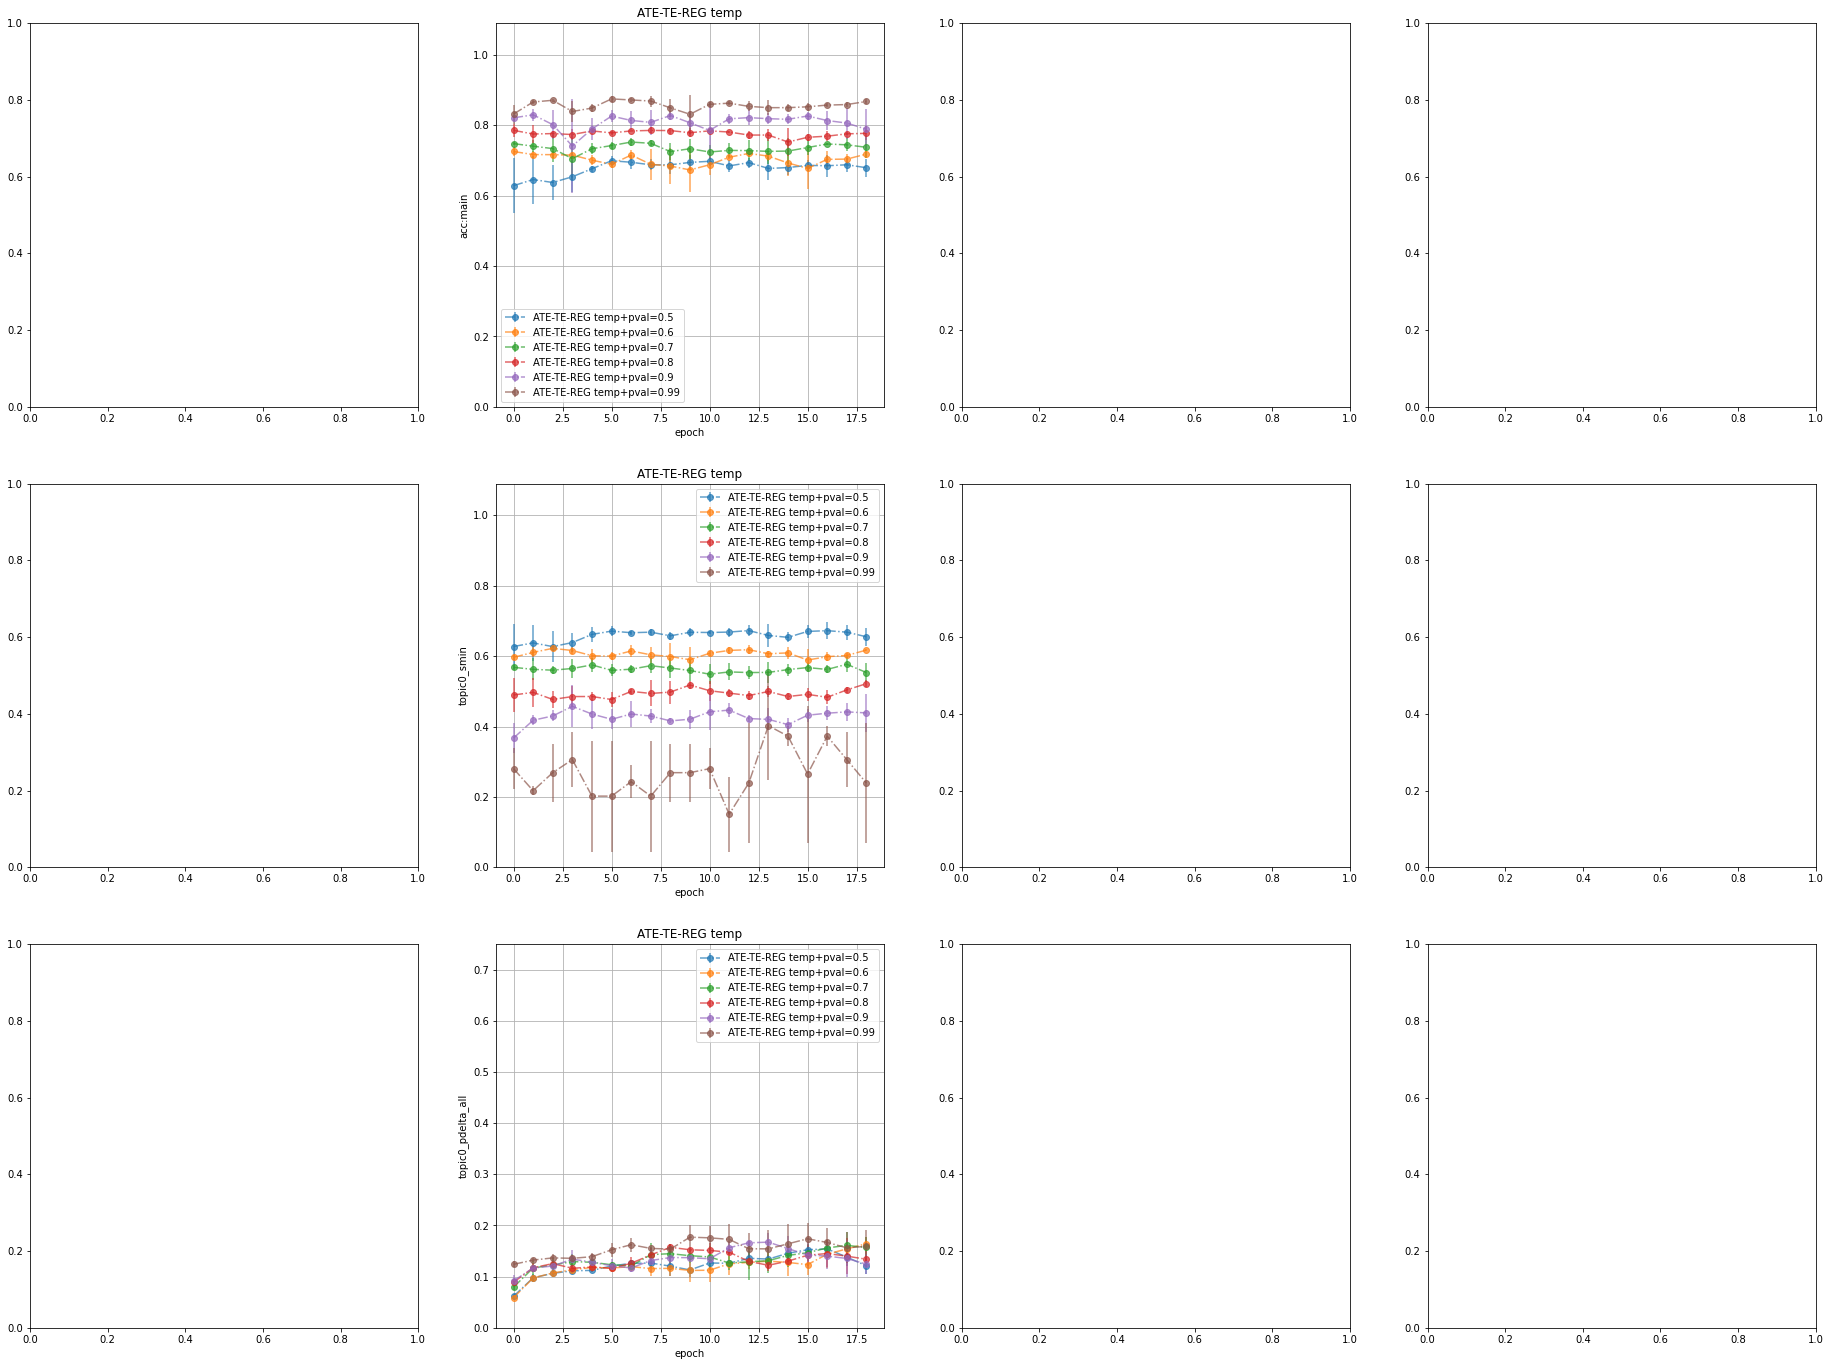

In [40]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = [-0.005,0.08,0.131,0.21,0.26,0.35]
ate_list_de_loss = [-0.017,0.07,0.09,0.21,0.3,0.26] #(0.7,0.12 miss)
ate_list_dr_acc = [0.01,0.05,0.15,0.18,0.22,0.24]
ate_list_dr_loss = [0.03,0.03,0.127,0.197,0.22,0.24]

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [-0.0002,0.124,0.0006,0.008,0.06,0.35]
ate_list_sel_dr_acc = [0.01,0.1,0.15,0.26,0.04,0.31] #(0.7,0.16 miss)


#alpha and gval section using the loss
ate_list_sel_de_loss = [-0.0002,0.001,0.0006,0.01,0.06,0.11] #(full slot missing)
ate_list_sel_dr_loss = [0.02,0.09,0.19,0.18,0.35,0.29]

num_cols = 4

topic_name="race"
sample=10000


telambda = 5
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/twitter_aae_sentiment_race/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/twitter_aae_sentiment_race/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).erm/probe_metric_list.json"


plt.rcParams['figure.figsize'] = [8*num_cols, 8*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),num_cols)

# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dummy,
#                          fname_pattern=erm_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
                             
#                          ),
#                          tidx=0,
#                          title="ERM",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_true,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=1,
#                          title="ATE-TE-REG True",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_de_acc,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=2,
#                          title="ATE-TE-REG DE-Acc",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_de_loss,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=3,
#                          title="ATE-TE-REG DE-Loss",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dr_acc,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=3,
#                          title="ATE-TE-REG DR-Acc",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dr_loss,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=5,
#                          title="ATE-TE-REG DR-Loss",
# )




plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_sel_dr_loss,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG temp",
)

## Sweep on the treatment effect

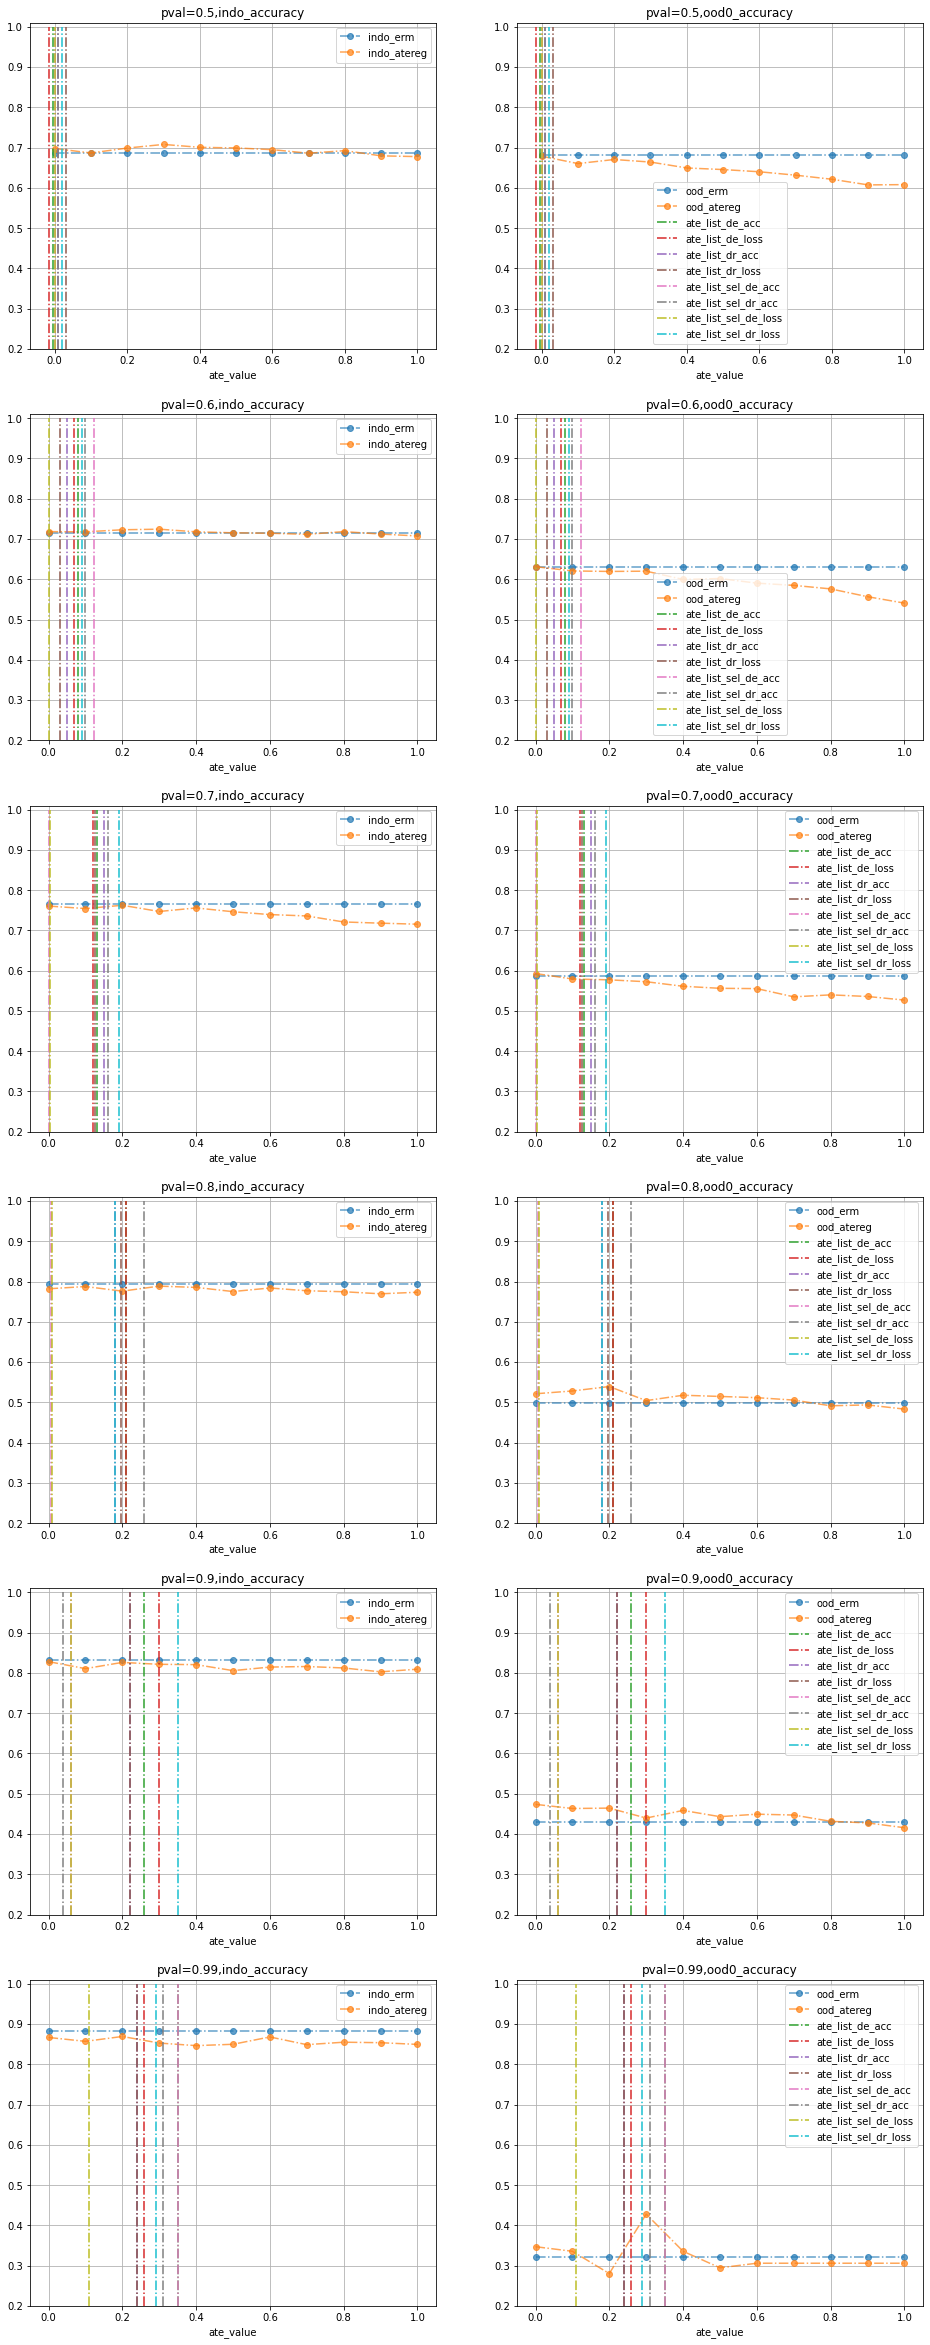

In [42]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = [-0.005,0.08,0.131,0.21,0.26,0.35]
ate_list_de_loss = [-0.017,0.07,0.12,0.21,0.3,0.26]
ate_list_dr_acc = [0.01,0.05,0.15,0.18,0.22,0.24]
ate_list_dr_loss = [0.03,0.03,0.127,0.197,0.22,0.24]

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [-0.0002,0.124,0.0006,0.008,0.06,0.35]
ate_list_sel_dr_acc = [0.01,0.1,0.16,0.26,0.04,0.31]


#alpha and gval section using the loss
ate_list_sel_de_loss = [-0.0001,0.001,0.004,0.01,0.06,0.11]
ate_list_sel_dr_loss = [0.02,0.09,0.19,0.18,0.35,0.29]



ate_sweep_list = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#Adding the ate to mark in the sweep plot
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
    ate_list_dr_acc = ate_list_dr_acc,
    ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
    ate_list_sel_de_loss = ate_list_sel_de_loss,
    ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="race"
sample=10000
num_topics=1


telambda = 5
noise=0.0

reg_fname_pattern="dataset/twitter_aae_sentiment_race/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/twitter_aae_sentiment_race/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).erm/probe_metric_list.json"

#Getting the best result for the erm runs
erm_pval_best_result = plot_one_result_timeline(ax=None,
                         plot_item_list=None,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                             
                         ),
                         tidx=None,
                         title=None,
                         no_plot_mode=True,
                         print_best_result=False,
)

#Getting the best result for every te effect in sweep list
atereg_pval_best_result={}
for ate_val in ate_sweep_list:
    atereg_pval_best_result[ate_val] = plot_one_result_timeline(ax=None,
                                                     plot_item_list=None,
                                                     run_list=run_list,
                                                     pval_list=pval_list,
                                                     ate_list=[ate_val,]*len(pval_list),
                                                     fname_pattern=reg_fname_pattern.format(
                                                                         "{1}",
                                                                         topic_name,
                                                                         sample,
                                                                         noise,
                                                                         "{0}",
                                                                         "{2}",
                                                                         telambda,

                                                     ),
                                                     tidx=None,
                                                     title=None,
                                                     no_plot_mode=True,
                                                     print_best_result=False,
    )



num_cols = num_topics+1 #assuming trained combined so only one indo
plt.rcParams['figure.figsize'] = [8*num_cols, 7*len(pval_list)]
fig,ax = plt.subplots(len(pval_list),num_cols)
#Plotting each of the variation for the pval
for pidx,pval in enumerate(pval_list):
    #Plotting the indo for the erm
    erm_best_indo = [erm_pval_best_result[pval]["indo"]]*len(ate_sweep_list)
    ax[pidx,0].plot(ate_sweep_list,erm_best_indo,ls="-.",marker="o",alpha=0.7,label="indo_erm")
    
    #Creating the varation of best indo and ood acc for each of the ate val
    atereg_best_indo = [atereg_pval_best_result[ate_val][pval]["indo"] for ate_val in ate_sweep_list]
    ax[pidx,0].plot(ate_sweep_list,atereg_best_indo,ls="-.",marker="o",alpha=0.7,label="indo_atereg")
    
    ax[pidx,0].set_title("pval={},indo_accuracy".format(pval))
    ax[pidx,0].set_xlabel("ate_value")
    ax[pidx,0].legend()
    ax[pidx,0].grid(True)
    ax[pidx,0].set_ylim(0.0,1.0)
    
    for tidx in range(0,num_cols-1):
        #Plotting the indo for the erm
        erm_best_ood = [erm_pval_best_result[pval]["ood{}".format(tidx)]]*len(ate_sweep_list)
        ax[pidx,tidx+1].plot(ate_sweep_list,erm_best_ood,ls="-.",marker="o",alpha=0.7,label="ood_erm")

        #Creating the varation of best indo and ood acc for each of the ate val
        atereg_best_ood = [atereg_pval_best_result[ate_val][pval]["ood{}".format(tidx)] for ate_val in ate_sweep_list]
        ax[pidx,tidx+1].plot(ate_sweep_list,atereg_best_ood,ls="-.",marker="o",alpha=0.7,label="ood_atereg")
        
        
        yllim=0.2
        yulim=1.01
        
        #Marking the location of diffrent ate estimates
        for ate_name, ate_list in ate_list_dict.items():
            yval_line = np.arange(yllim,yulim,0.1)
            xval_mark = [ate_list[pidx]]*yval_line.shape[0]
            
            #Marking the ate as the vertical line
            ax[pidx,tidx+1].plot(xval_mark,yval_line,ls="-.",label=ate_name)
            ax[pidx,0].plot(xval_mark,yval_line,ls="-.",label=ate_name)
    
        ax[pidx,tidx+1].set_title("pval={},ood{}_accuracy".format(pval,tidx))
        ax[pidx,tidx+1].set_xlabel("ate_value")
        ax[pidx,tidx+1].legend()
        ax[pidx,tidx+1].grid(True)
        ax[pidx,tidx+1].set_ylim(yllim,yulim)
        ax[pidx,0].set_ylim(yllim,yulim)
    
plt.show()